<a href="https://colab.research.google.com/github/lucasbarreiroe/IAA/blob/main/Predictor%20de%20posiciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO PRÁCTICO - *INTROD. AL APRENDIZAJE AUTOMÁTICO* - **PREDICCIÓN DE POSICIONES**

## **PRIMERA SECCIÓN DEL TP** - **RECOLECCIÓN, LIMPIEZA Y TRATADO DE DATOS**

##### Importamos las librerías con las que trabajaremos de ahora en más.



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

##### Cargamos el dataset en cuestión. Éste posee las estadísticas de jugadores pertenecientes a distintas Ligas Europeas que hayan disputado al menos el 30% de los partidos durante la última temporada.

In [2]:
df_players = pd.read_excel('/content/df_players.xlsx')
#df_players.head()

##### Comenzamos a transformar el df puliéndolo. Nos quedamos con las variables que nos puedan llegar a interesar, modificamos las posiciones a nombres en Español no abreviados y reemplazamos valores faltantes.

In [3]:
columnas = df_players.columns
for col in columnas:
  print(col)

Jugador
Equipo
Equipo durante el período seleccionado
Posición específica
Edad
Valor de mercado (Transfermarkt)
Vencimiento contrato
Partidos jugados
Minutos jugados
Goles
xG
Asistencias
xA
Duelos/90
Duelos ganados, %
País de nacimiento
Pasaporte
Pie
Altura
Peso
En prestamo
Acciones defensivas realizadas/90
Duelos defensivos/90
Duelos defensivos ganados, %
Duelos aéreos en los 90
Duelos aéreos ganados, %
Entradas/90
Posesión conquistada después de una entrada
Tiros interceptados/90
Interceptaciones/90
Posesión conquistada después de una interceptación
Faltas/90
Tarjetas amarillas
Tarjetas amarillas/90
Tarjetas rojas
Tarjetas rojas/90
Acciones de ataque exitosas/90
Goles/90
Goles (excepto los penaltis)
Goles, excepto los penaltis/90
xG/90
Goles de cabeza
Goles de cabeza/90
Remates
Remates/90
Tiros a la portería, %
Goles hechos, %
Asistencias/90
Centros/90
Precisión centros, %
Centros desde la banda izquierda/90
Precisión centros desde la banda izquierda, %
Centros desde la banda derecha

In [4]:
# Eliminamos features de arqueros, no nos interesan.
df_players = df_players.drop(columns = ['Goles recibidos/90', 'Remates en contra/90',
                                        'Goles evitados', 'Goles evitados/90', 'Salidas/90',
                                        'Duelos aéreos en los 90.1'
                                        ]
)

Dividimos posiciones en tres columnas diferentes. Luego, nos quedamos solo con la primera y la duplicamos para crear Pos. Gral. y Pos. Específica


In [5]:
# Dividimos posiciones en tres columnas diferentes. Luego, nos quedamos solo con la primera y la duplicamos para crear Pos. Gral. y Pos. Específica

df_players[['Posición general', 'p2', 'p3']] = df_players['Posición específica'].str.split(",", expand=True)

df_players = df_players.drop(columns=['Posición específica', 'p2', 'p3'])

df_players['Posición específica'] = df_players['Posición general']

df_players['Posición específica'].unique()

array(['GK', 'LCB', 'AMF', 'RB', 'LB', 'RCB', 'LAMF', 'RDMF', 'CB',
       'LDMF', 'CF', 'RCMF', 'DMF', 'RWF', 'LCMF', 'LWF', 'LW', 'RW',
       'LWB', 'RAMF', 'RWB'], dtype=object)

In [6]:
df_players['Posición específica'] = df_players['Posición general']

df_players['Posición específica'].unique()

array(['GK', 'LCB', 'AMF', 'RB', 'LB', 'RCB', 'LAMF', 'RDMF', 'CB',
       'LDMF', 'CF', 'RCMF', 'DMF', 'RWF', 'LCMF', 'LWF', 'LW', 'RW',
       'LWB', 'RAMF', 'RWB'], dtype=object)

In [7]:
# Cambiamos los nombres de ambas columnas de Posición

df_players = df_players.replace({'Posición específica': {'GK': 'Arquero',
                                                         'LCB': 'Defensor central',
                                                         'AMF': 'Mediocampista ofensivo',
                                                         'RB': 'Lateral derecho',
                                                         'LB': 'Lateral izquierdo',
                                                         'RCB': 'Defensor central',
                                                         'LAMF': 'Mediocampista ofensivo',
                                                         'RDMF': 'Mediocampista defensivo',
                                                         'CB': 'Defensa central',
                                                         'LDMF': 'Mediocampista defensivo',
                                                         'CF': 'Delantero central',
                                                         'RCMF': 'Mediocampista central',
                                                         'DMF': 'Mediocampista defensivo',
                                                         'RWF': 'Extremo derecho',
                                                         'LCMF': 'Mediocampista central',
                                                         'LWF': 'Extremo izquierdo',
                                                         'LW': 'Extremo izquierdo',
                                                         'RW': 'Extremo derecho',
                                                         'LWB': 'Lateral izquierdo',
                                                         'RAMF': 'Mediocampista ofensivo',
                                                         'RWB': 'Lateral derecho'}
                                 }
                                )


df_players = df_players.replace({'Posición general': {'GK': 'Arquero',
                                                         'LCB': 'Defensor',
                                                         'AMF': 'Mediocampista',
                                                         'RB': 'Defensor',
                                                         'LB': 'Defensor',
                                                         'RCB': 'Defensor',
                                                         'LAMF': 'Mediocampista',
                                                         'RDMF': 'Mediocampista',
                                                         'CB': 'Defensor',
                                                         'LDMF': 'Mediocampista',
                                                         'CF': 'Delantero',
                                                         'RCMF': 'Mediocampista',
                                                         'DMF': 'Mediocampista',
                                                         'RWF': 'Delantero',
                                                         'LCMF': 'Mediocampista',
                                                         'LWF': 'Delantero',
                                                         'LW': 'Delantero',
                                                         'RW': 'Delantero',
                                                         'LWB': 'Defensor',
                                                         'RAMF': 'Mediocampista',
                                                         'RWB': 'Defensor'}
                                 }
                                )



In [8]:
clubes = df_players['Equipo durante el período seleccionado']
clubes = clubes.sort_values()
clubes = clubes.unique()
for club in clubes:
  print(club)

AB
AEK Athens
AEK Larnaca 
AGF
APOEL
ASD Asti
AZ
Aberdeen
Adana Demirspor
Ajax
Ajax II
Akademija Pandev
Akhmat Grozny
Al Ahli
Al Bukayriyah
Al Duhail
Al Faisaly
Al Hilal
Al Ittihad
Al Khaleej
Al Nassr
Al Qadisiyah
Al Rayyan
Al Riyadh
Al Shabab
Al Shamal
Al Ta'ee
Alashkert
Albacete
Almería
Anderlecht
Ankaragücü
Antalyaspor
Antwerp
Apollon
Ararat-Armenia
Araz
Aris
Arouca
Arsenal
Arsenal Tivat
Ascoli
Astana
Aston Villa
Atalanta
Atalanta U23
Athletic Bilbao
Atlètic Club d'Escaldes
Atlético Madrid
Augsburg
Austria Wien
BATE
Bala Town
Ballkani
Balzan
Baník Ostrava
Barcelona
Barcelona B
Basel
Basel II
Bayer Leverkusen
Bayer Leverkusen U19
Bayern München
Bačka Topola
Beitar Jerusalem
Benfica
Betis Deportivo
Beşiktaş
Birkirkara
Blackpool
Bnei Sakhnin
Bochum
Bohemians 1905
Bologna
Boluspor
Borac Banja Luka
Borussia Dortmund
Borussia Dortmund II
Borussia Dortmund U19
Borussia M'gladbach
Botev Plovdiv
Bournemouth
Bournemouth U21
Brentford
Brest
Brighton
Bristol Rovers
Budućnost
Burnley
CFR Cluj
CS

In [9]:
# Creamos una lista de clubes por Liga. Nos interesa identificar los jugadores pertenecientes a las 5 grandes ligas europeas. Luego, los que no pertenezcan a las 5 GL serán 'Otras Ligas'

# Listas de clubes por liga
premier_league = [
    'Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Burnley', 'Chelsea', 'Crystal Palace',
    'Everton', 'Fulham', 'Liverpool', 'Luton Town', 'Manchester City', 'Manchester United', 'Newcastle United',
    'Nottingham Forest', 'Sheffield United', 'Tottenham Hotspur', 'West Ham United', 'Wolverhampton Wanderers'
]

laliga = [
    'Almería', 'Athletic Bilbao', 'Atlético Madrid', 'Barcelona', 'Cádiz', 'Celta de Vigo', 'Getafe', 'Girona',
    'Granada', 'Las Palmas', 'Mallorca', 'Osasuna', 'Rayo Vallecano', 'Real Betis', 'Real Madrid', 'Real Sociedad',
    'Sevilla', 'Valencia', 'Villarreal'
]

ligue1 = [
    'Brest', 'Clermont', 'Le Havre', 'Lens', 'Lille', 'Lorient', 'Olympique Lyonnais', 'Olympique Marseille', 'Metz',
    'Monaco', 'Montpellier', 'Nantes', 'Nice', 'PSG', 'Reims', 'Rennes', 'Strasbourg', 'Toulouse'
]

serie_a = [
    'Atalanta', 'Bologna', 'Cagliari', 'Empoli', 'Fiorentina', 'Frosinone', 'Genoa', 'Inter', 'Juventus',
    'Lazio', 'Lecce', 'Milan', 'Monza', 'Napoli', 'Roma', 'Salernitana', 'Sassuolo', 'Torino', 'Udinese', 'Verona'
]

bundesliga = [
    'Augsburg', 'Bayer Leverkusen', 'Bayern München', 'Bochum', 'Borussia Dortmund', 'Borussia M\'gladbach', 'Darmstadt 98',
    'Eintracht Frankfurt', 'Freiburg', 'Heidenheim', 'Hoffenheim', 'Köln', 'Mainz 05', 'RB Leipzig', 'Stuttgart',
    'Union Berlin', 'Werder Bremen', 'Wolfsburg'
]

# Función para asignar la liga
def asignar_liga(club):
    if club in premier_league:
        return 'Premier League'
    elif club in laliga:
        return 'La Liga'
    elif club in ligue1:
        return 'Ligue 1'
    elif club in serie_a:
        return 'Serie A'
    elif club in bundesliga:
        return 'Bundesliga'
    else:
        return 'Otras Ligas'

# Asignar la liga a cada club en el DataFrame
df_players['Liga'] = df_players['Equipo durante el período seleccionado'].apply(asignar_liga)

In [10]:
# Reemplazamos valores faltantes por la mediana por Liga y Posición, para ser más específicos.
columnas_numericas = df_players.select_dtypes(include=[np.number]).columns

def reemplazar_faltantes_por_mediana(df, cols, group_cols):
    for col in cols:
        # Calcular la mediana por grupo
        medianas = df.groupby(group_cols)[col].transform('median')
        # Reemplazar valores faltantes
        df[col] = df[col].fillna(medianas)
    return df

# Reemplazar los valores faltantes solo en las columnas numéricas
df_players = reemplazar_faltantes_por_mediana(df_players, columnas_numericas, ['Liga', 'Posición general'])

## **EDA**




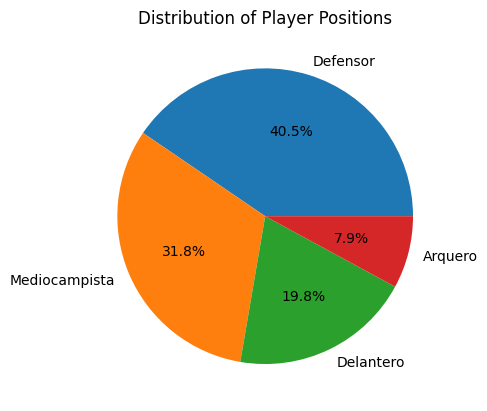

In [11]:
positions = df_players['Posición general'].value_counts()
labels = positions.index.to_list()

plt.pie(positions, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Player Positions')
plt.show()

Los siguientes graficos muestran, en primera instancia contando las 'Otras Ligas' y luego sin, puesto que seguramente hay un desbalanceo de datos

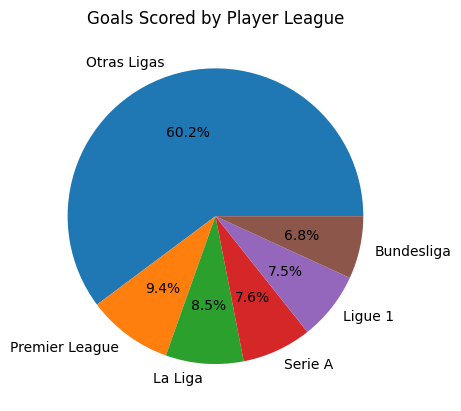

In [12]:
Leagues = df_players['Liga'].value_counts()
labels = Leagues.index.to_list()

plt.pie(Leagues, labels=labels, autopct='%1.1f%%')
plt.title('Goals Scored by Player League') #Hay un desbalanceo de los datos seguramente
plt.show()

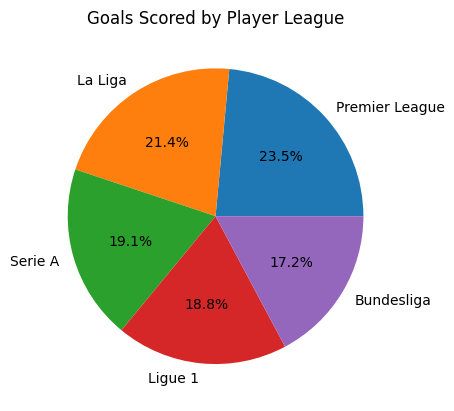

In [13]:
df_filtered = df_players[df_players['Liga'] != 'Otras Ligas']
Leagues = df_filtered['Liga'].value_counts()
labels = Leagues.index.to_list()

plt.pie(Leagues, labels=labels, autopct='%1.1f%%')
plt.title('Goals Scored by Player League') #Hay un desbalanceo de los datos seguramente
plt.show()

/tmp/ipython-input-14-4091074109.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Pie', y='Goles', data=df_players, palette='dark')


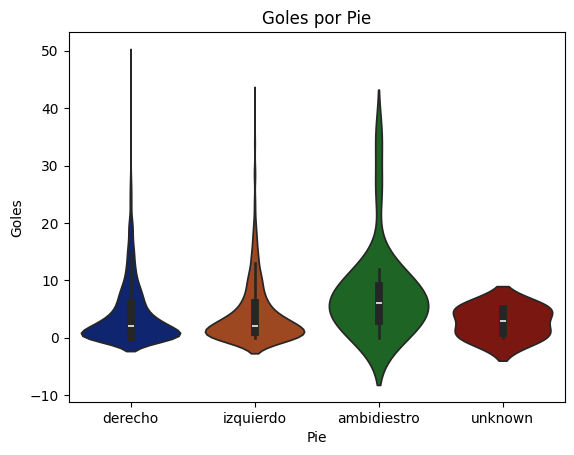

In [14]:
sns.violinplot(x='Pie', y='Goles', data=df_players, palette='dark')
plt.title('Goles por Pie')
plt.show()

## **PLANTEO DE PROPUESTA - PASOS PREVIOS A MODELADO**



##### Con todo el tratado de datos y el EDA previo, entramos a la primer etapa del trabajo.
##### Dentro de todos los jugadores que tenemos en el df decidimos analizar las posiciones del campo de juego. ¿Por qué? Porque buscamos predecir las posiciones generales de nuestros jugadores a través de un modelo de clasificación.
##### Al tener tantos features dentro de nuestro conjunto de datos, decidimos elegir diferentes características ofensivas, generales y defensivas que permitan evaluar de forma equitativa a nuestros jugadores para que más tarde nuestro modelo pueda predecir la posición dentro del campo de juego teniendo en cuenta esas variables.
##### Creemos que predecir la posición puede resultar una práctica útil ya que permite a los equipos tener un uso más eficiente de sus jugadores dado que, probablemente, obtengamos jugadores clasificados con diferente posición a la original.


In [15]:
columnas_elegidas = [
    # Info. General
    'Jugador',
    'Equipo durante el período seleccionado',
    'Liga',
    'Posición general',
    'Posición específica',
    # Contribución Ofensiva
    'Goles/90',
    'xG/90',
    'Asistencias/90',
    'xA/90',
    'Remates/90',
    'Acciones de ataque exitosas/90',
    'Regates/90',
    'Regates realizados, %',
    # Contribución general
    'Faltas recibidas/90',
    'Faltas/90',
    'Pases/90',
    'Pases hacia adelante/90',
    'Pases cortos / medios /90',
    'Pases largos/90',
    'Pases recibidos /90',
    # contribución defensiva
    'Duelos/90',
    'Acciones defensivas realizadas/90',
    'Entradas/90',
    'Interceptaciones/90',
    'Duelos aéreos en los 90'
    ]

df_playstyle = df_players[columnas_elegidas]
df_playstyle = df_playstyle[df_playstyle['Posición general'] != 'Arquero']

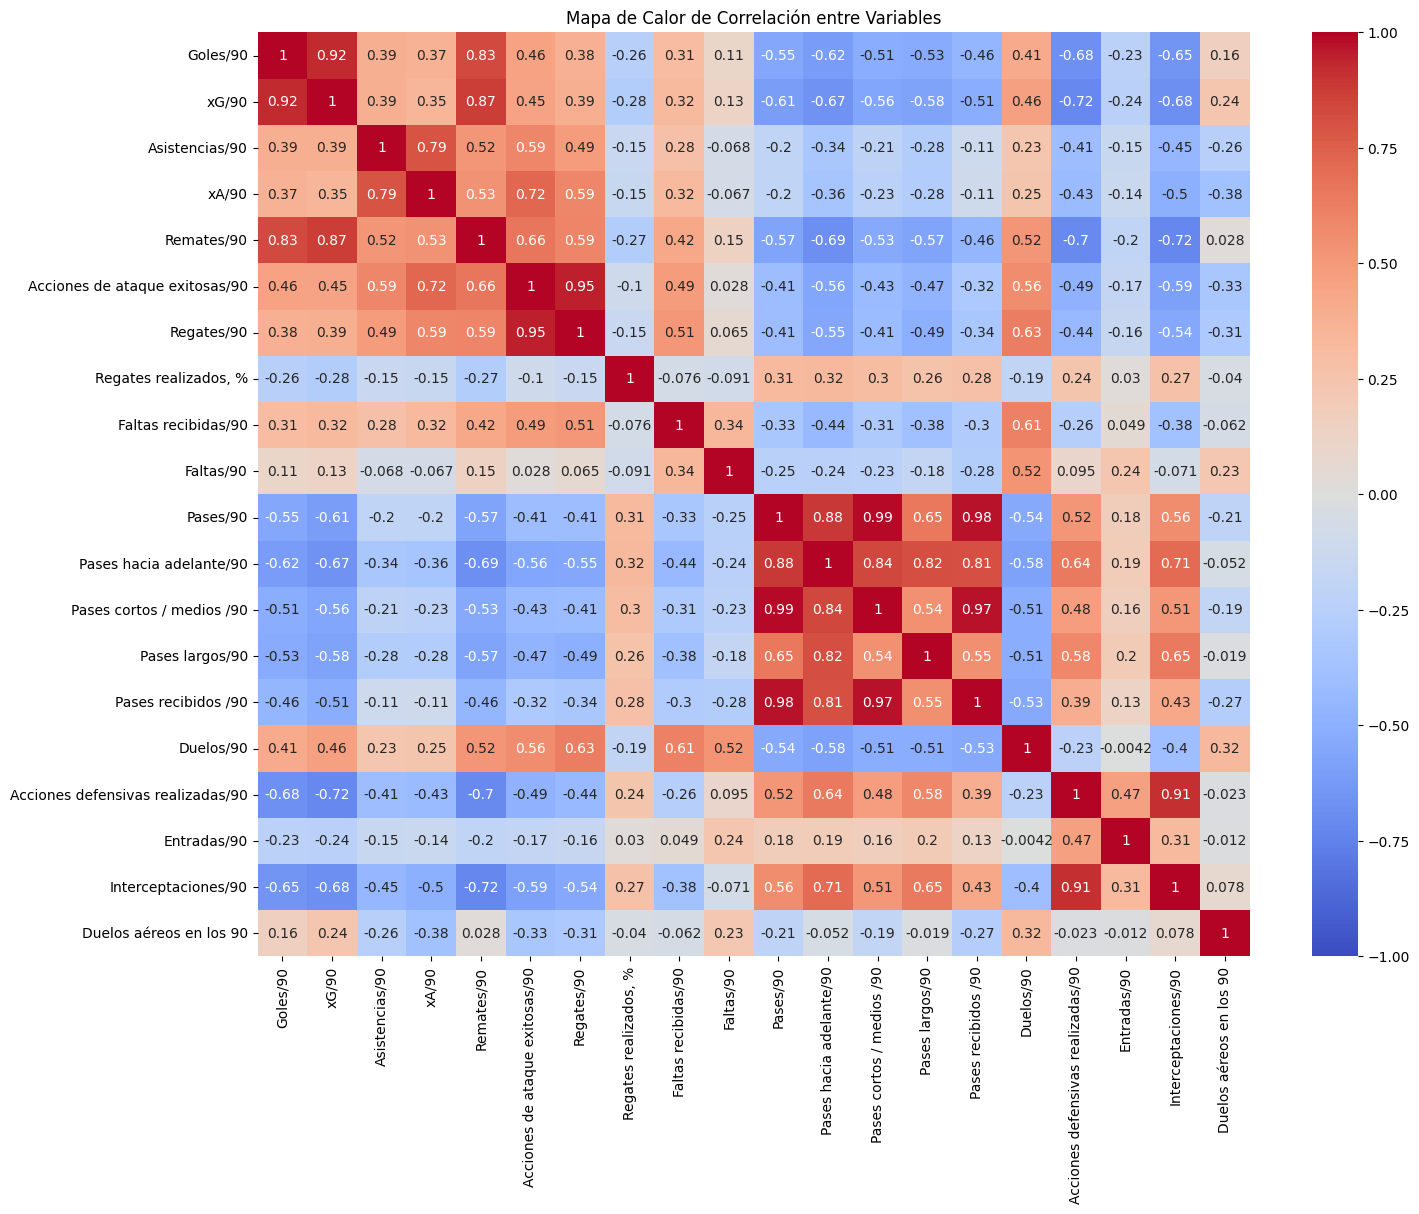

In [16]:
# Variables que nos interesan para el análisis
df_numerico = df_playstyle.select_dtypes(include=[np.number])
# Heatmap de correlación entre las variables de interés
plt.figure(figsize=(16, 12))
correlation_matrix = df_numerico.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()

##### Antes de empezar a buscar modelos de clasificación, debemos escalar nuestras variables. Éstas tienen diferentes unidades de medida y/o diferentes rangos, por lo que si las dejamos como están originalmente, los features con escalas más grandes pueden llegar a tener una inferencia mucho mayor que los de menor escala, generando un sesgo en los datos y en los resultados. Necesitamos equitatividad.

In [17]:
columnas_elegidas_ = df_playstyle.select_dtypes(include=[np.number]).columns

df_filtrado = df_playstyle[columnas_elegidas_]

# Escalamos las características numéricas
# Usamos combinación de fit y transform para ajustar y transformar los datos en una sola llamada.
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_filtrado)

In [18]:
df_playstyle.shape[0] == features_scaled.shape[0]

True

##### Con los features seleccionados ya escalados, podemos empezar a pensar en diferentes modelos. Antes, creamos una nueva columna que traduzca las posiciones generales en números, para que los modelos puedan predecir de forma adecuada.

In [19]:
df_playstyle['Posición general_num'] = df_playstyle['Posición general'].replace({
    'Delantero': 0,
    'Mediocampista': 1,
    'Defensor': 2
})

/tmp/ipython-input-19-2292137317.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_playstyle['Posición general_num'] = df_playstyle['Posición general'].replace({


# **MODELADO** - **ANÁLISIS DE MALAS PREDICCIONES**

##### Comenzamos a evaluar modelos. Decidimos elegir RandomForest y XGBoost para clasificar las posiciones de los jugadores.
##### Dividimos los datos con train-test y empezamos a analizar cuál es el modelo que mejor prediga nuestros datos.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, df_playstyle['Posición general_num'], test_size=0.3, random_state=42)

##### Primero, optamos por RandomForest. Tomamos un modelo base para después aplicar un GridSearch que elija los hiperparámetros más adecuados para nuestro problema. Luego, con la matriz de confusión ya realizada, aplicamos Validación Cruzada al RF seleccionado previamente para verificar sus métricas.

In [21]:
rf_classifier = RandomForestClassifier(n_estimators=100,
                                       max_depth = 12,
                                       random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       197
           1       0.72      0.74      0.73       296
           2       0.89      0.90      0.90       443

    accuracy                           0.83       936
   macro avg       0.82      0.81      0.81       936
weighted avg       0.83      0.83      0.83       936

Matriz de confusión:
[[155  42   0]
 [ 29 219  48]
 [  1  43 399]]


In [22]:
# Definir el grid de parámetros
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [22, 30, 35],
    'criterion': ['gini']
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_search.best_params_)

# Evaluar el modelo optimizado
best_rf_classifier = grid_search.best_estimator_
y_pred_optimized = best_rf_classifier.predict(X_test)

print("Matriz de confusión (modelo optimizado):")
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
print(conf_matrix_optimized)

Mejores parámetros encontrados: {'criterion': 'gini', 'max_depth': 22, 'n_estimators': 200}
Matriz de confusión (modelo optimizado):
[[157  40   0]
 [ 29 222  45]
 [  1  44 398]]


In [23]:
# Elegimos el modelo que nos determinó el grid search
rf_classifier = RandomForestClassifier(n_estimators=200,
                                       max_depth = 22,
                                       random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("Precisión del modelo:")
print(accuracy_score(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       197
           1       0.73      0.75      0.74       296
           2       0.90      0.90      0.90       443

    accuracy                           0.83       936
   macro avg       0.82      0.82      0.82       936
weighted avg       0.83      0.83      0.83       936

Matriz de confusión:
[[157  40   0]
 [ 29 222  45]
 [  1  44 398]]
Precisión del modelo:
0.8301282051282052
Accuracy: 0.8301282051282052
Precision: 0.8211607510505399
Recall: 0.8151247264268772
F1 Score: 0.817889908710785


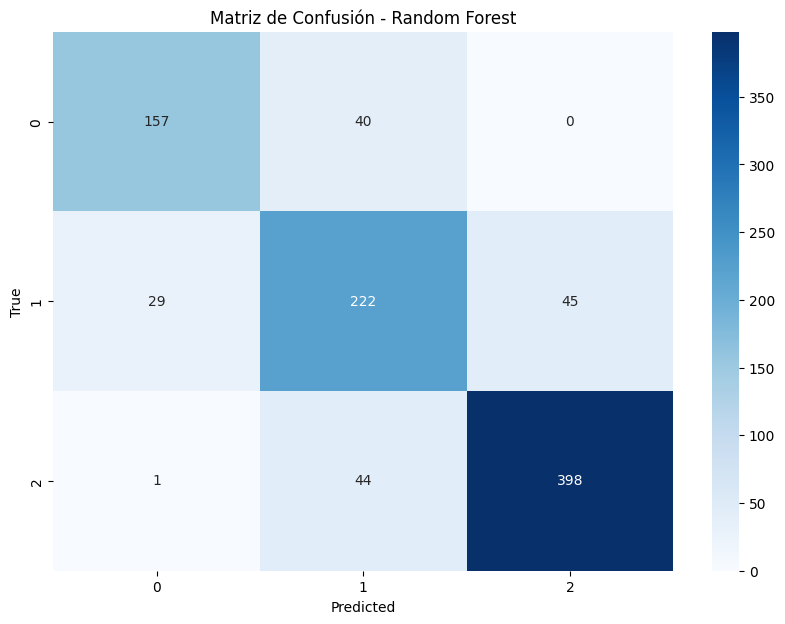

In [24]:
# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

In [25]:
# Realizamos la validación cruzada con múltiples métricas
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(rf_classifier, X_train, y_train, cv=5, scoring=scoring)

# Mostramos los resultados
print("Promedio de Accuracy:", round(np.mean(cv_results['test_accuracy']), 4))
print("SD de Accuracy:", round(np.std(cv_results['test_accuracy']), 4))

print("Promedio de Precisión:", round(np.mean(cv_results['test_precision_macro']), 4))
print("SD de Precisión:", round(np.std(cv_results['test_precision_macro']), 4))

print("Promedio de Recall:", round(np.mean(cv_results['test_recall_macro']), 4))
print("SD de Recall:", round(np.std(cv_results['test_recall_macro']), 4))

print("Promedio de F1:",round(np.mean(cv_results['test_f1_macro']), 4))
print("SD de F1:", round(np.std(cv_results['test_f1_macro']), 4))

Promedio de Accuracy: 0.8259
SD de Accuracy: 0.0158
Promedio de Precisión: 0.8201
SD de Precisión: 0.0136
Promedio de Recall: 0.8111
SD de Recall: 0.0188
Promedio de F1: 0.8146
SD de F1: 0.0163


##### Ahora, evaluamos y analizamos el XGBoost. También realizamos Grid Search, buscamos métricas y aplicamos CV.

In [26]:
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       197
           1       0.76      0.78      0.77       296
           2       0.94      0.93      0.93       443

    accuracy                           0.85       936
   macro avg       0.83      0.83      0.83       936
weighted avg       0.85      0.85      0.85       936

Matriz de confusión:
[[153  44   0]
 [ 36 232  28]
 [  3  29 411]]


In [27]:
# Definir el grid de parámetros
param_grid = {
    'n_estimators': [200, 350, 500],
    'max_depth': [22, 30, 40]
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_search.best_params_)

# Evaluar el modelo optimizado
best_rf_classifier = grid_search.best_estimator_
y_pred_optimized = best_rf_classifier.predict(X_test)

print("Reporte de clasificación (modelo optimizado):")
print(classification_report(y_test, y_pred_optimized))

print("Matriz de confusión (modelo optimizado):")
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
print(conf_matrix_optimized)

print("Precisión del modelo optimizado:")
print(accuracy_score(y_test, y_pred_optimized))

Mejores parámetros encontrados: {'max_depth': 22, 'n_estimators': 200}
Reporte de clasificación (modelo optimizado):
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       197
           1       0.77      0.82      0.79       296
           2       0.95      0.92      0.93       443

    accuracy                           0.86       936
   macro avg       0.84      0.84      0.84       936
weighted avg       0.86      0.86      0.86       936

Matriz de confusión (modelo optimizado):
[[154  43   0]
 [ 31 243  22]
 [  4  31 408]]
Precisión del modelo optimizado:
0.8600427350427351


In [28]:
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=22,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("Precisión del modelo:")
print(accuracy_score(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       197
           1       0.77      0.82      0.79       296
           2       0.95      0.92      0.93       443

    accuracy                           0.86       936
   macro avg       0.84      0.84      0.84       936
weighted avg       0.86      0.86      0.86       936

Matriz de confusión:
[[154  43   0]
 [ 31 243  22]
 [  4  31 408]]
Precisión del modelo:
0.8600427350427351
Accuracy: 0.8600427350427351
Precision: 0.843404512770908
Recall: 0.8412216874205966
F1 Score: 0.8418191836302004


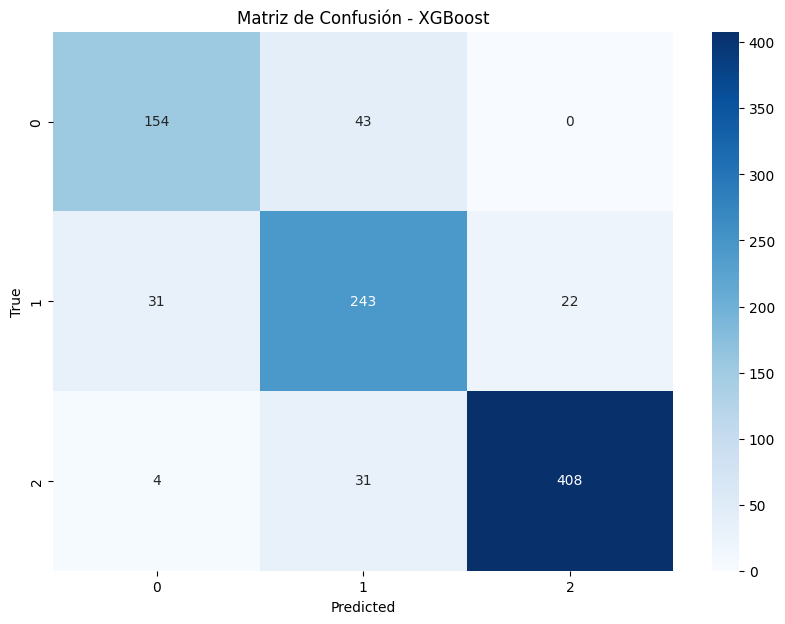

In [29]:
# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=xgb.classes_, yticklabels=xgb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - XGBoost')
plt.show()

In [30]:
# Realizamos la validación cruzada con múltiples métricas
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(xgb, X_train, y_train, cv=5, scoring=scoring)

# Mostramos los resultados
print("Promedio de Accuracy:", round(np.mean(cv_results['test_accuracy']), 4))
print("SD de Accuracy:", round(np.std(cv_results['test_accuracy']), 4))

print("Promedio de Precisión:", round(np.mean(cv_results['test_precision_macro']), 4))
print("SD de Precisión:", round(np.std(cv_results['test_precision_macro']), 4))

print("Promedio de Recall:", round(np.mean(cv_results['test_recall_macro']), 4))
print("SD de Recall:", round(np.std(cv_results['test_recall_macro']), 4))

print("Promedio de F1:",round(np.mean(cv_results['test_f1_macro']), 4))
print("SD de F1:", round(np.std(cv_results['test_f1_macro']), 4))

Promedio de Accuracy: 0.842
SD de Accuracy: 0.0188
Promedio de Precisión: 0.8323
SD de Precisión: 0.02
Promedio de Recall: 0.8268
SD de Recall: 0.022
Promedio de F1: 0.8286
SD de F1: 0.0206


##### Si bien es poca la diferencia entre RF y XGBoost, parece tener mejores métricas de evaluación este último mencionado. Por lo tanto, lo utilizaremos como modelo.

##### Con el modelo ya seleccionado y con la matriz de confusión ya realizada, ahora nos proponemos analizar a aquellos jugadores mal clasificados. Deseamos entender el porqué de ello. Para eso, primero queremos identificarlos. Una vez que encontremos quiénes son, analizamos su posición específica dentro de la cancha, y luego compararemos sus estadísticas junto a las de su clase predicha y su clase real, para darnos una idea de qué es lo que está ocurriendo para que sean mal clasificados.

Jugadores que estan en el test para posteriormente encontrar los mal clasificados


In [31]:
shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
y = df_playstyle['Posición general_num']
lista_test_index = []
lista_train_index = []

for train_index, test_index in shuffle_split.split(features_scaled):
    lista_test_index.append(test_index)
    lista_train_index.append(train_index)
    X_train, X_test = features_scaled[train_index], features_scaled[test_index]
print(len(lista_train_index[0]))
print(len(lista_test_index[0]))

2183
936


In [32]:
df_test = pd.DataFrame()
df_train = pd.DataFrame()
headers = list(df_playstyle.columns)
lista_train = []
lista_test = []

for id in lista_train_index[0]:
  fila = df_playstyle.iloc[id]
  diccionario_fila = fila.to_dict()
  lista_train.append(diccionario_fila)

for id in lista_test_index[0]:
  fila = df_playstyle.iloc[id]
  diccionario_fila = fila.to_dict()
  lista_test.append(diccionario_fila)

df_train = pd.DataFrame(lista_train)
df_test = pd.DataFrame(lista_test)

y_train = df_train['Posición general_num']
y_test = df_test['Posición general_num']
print(y_train.shape)
print(y_test.shape)

(2183,)
(936,)


In [33]:
df_test['predict'] = y_pred

#### Mediocampistas

---




Armo dataset de los mediocampistas que fueron mal clasificados.

mediocampistas_0: mediocampistas que el modelo predijo 0 (delanteros)

mediocampistas_2: mediocampistas que el modelo predijo 2 (defensores)

In [34]:
test_filtrado1 = df_test[df_test['Posición general_num'] == 1]
mediocampistas_0 = test_filtrado1[test_filtrado1['predict'] == 0]
mediocampistas_2 = test_filtrado1[test_filtrado1['predict'] == 2]
print(mediocampistas_0.shape[0])
print(mediocampistas_2.shape[0])

31
22


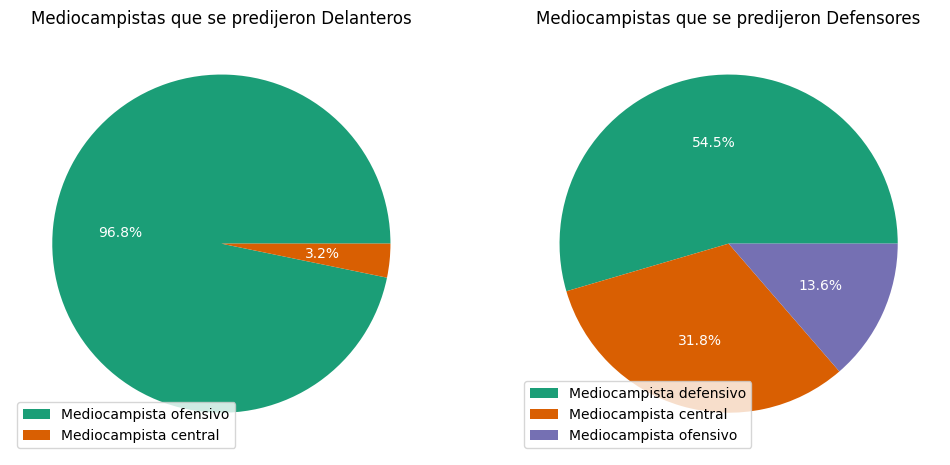

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Primer gráfico: Mediocampistas que se predijeron Delanteros
pos0 = mediocampistas_0['Posición específica'].value_counts()
labels0 = pos0.index.to_list()
colors0 = plt.cm.Dark2(range(len(labels0)))
axs[0].pie(pos0, colors=colors0, autopct='%1.1f%%', textprops={'color': 'white'})
axs[0].set_title('Mediocampistas que se predijeron Delanteros')
axs[0].legend(labels=labels0, loc='lower left')

# Segundo gráfico: Mediocampistas que se predijeron Defensores
pos2 = mediocampistas_2['Posición específica'].value_counts()
labels2 = pos2.index.to_list()
colors2 = plt.cm.Dark2(range(len(labels2)))
axs[1].pie(pos2, colors=colors2, autopct='%1.1f%%', textprops={'color': 'white'})
axs[1].set_title('Mediocampistas que se predijeron Defensores')
axs[1].legend(labels=labels2, loc='lower left')

plt.show()

In [36]:
m0_filter = mediocampistas_0[mediocampistas_0['Posición específica'] == 'Mediocampista ofensivo']
print(m0_filter)

                 Jugador Equipo durante el período seleccionado  \
30              D. Malen                      Borussia Dortmund   
60            João Félix                              Barcelona   
108            C. Palmer                                Chelsea   
109            T. Heintz                             CSKA Sofia   
156               T. Kiš                               Zrinjski   
177              W. Zaha                            Galatasaray   
189           R. Kirilov                        CSKA 1948 Sofia   
203             M. Grüll                             Rapid Wien   
237          J. Menéndez                               Kifissia   
315              M. Baku                                    OFI   
336        K. Aktürkoğlu                            Galatasaray   
363  Francisco Conceicão                                  Porto   
372       C. Hudson-Odoi                      Nottingham Forest   
423        J. Le Douaron                                  Bres

Tiene sentido que dentro de los mediocampistas que fueron clasificados como delanteros sean mayoritariamente Mediocampistas ofensivos y lo mismo del otro lado

In [37]:
m2_filter = mediocampistas_2[mediocampistas_2['Posición específica'] == 'Mediocampista ofensivo']
print(m2_filter)

                Jugador Equipo durante el período seleccionado         Liga  \
146       Pablo Fornals                             Real Betis      La Liga   
544          K. Selmani                                  Drita  Otras Ligas   
840  K. Van Den Kerkhof                                   Metz      Ligue 1   

    Posición general     Posición específica  Goles/90  xG/90  Asistencias/90  \
146    Mediocampista  Mediocampista ofensivo      0.08   0.13            0.08   
544    Mediocampista  Mediocampista ofensivo      0.05   0.08            0.10   
840    Mediocampista  Mediocampista ofensivo      0.04   0.08            0.15   

     xA/90  Remates/90  ...  Pases cortos / medios /90  Pases largos/90  \
146   0.13        1.09  ...                      36.55             2.94   
544   0.15        0.86  ...                      25.19             1.38   
840   0.17        1.06  ...                      17.39             2.53   

     Pases recibidos /90  Duelos/90  Acciones defensivas 

#### Delanteros

---



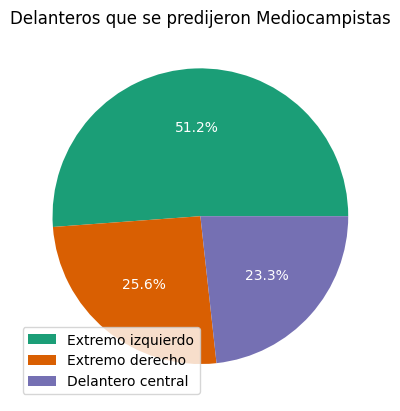

In [38]:
test_filtrado0 = df_test[df_test['Posición general_num'] == 0]
delanteros_1 = test_filtrado0[test_filtrado0['predict'] == 1]

plt.plot(figsize=(12, 6))

pos1 = delanteros_1['Posición específica'].value_counts()
labels1 = pos1.index.to_list()
colors1 = plt.cm.Dark2(range(len(labels1)))
plt.pie(pos1, colors=colors1, autopct='%1.1f%%', textprops={'color': 'white'})
plt.title('Delanteros que se predijeron Mediocampistas')
plt.legend(labels=labels1, loc='lower left')
plt.show()

Los extremos izquierdos :tienden a ser un poco mas defensivos que los derechos


In [39]:
delcentro_1 = delanteros_1[delanteros_1['Posición específica'] == 'Delantero central']

#### Defensores

---



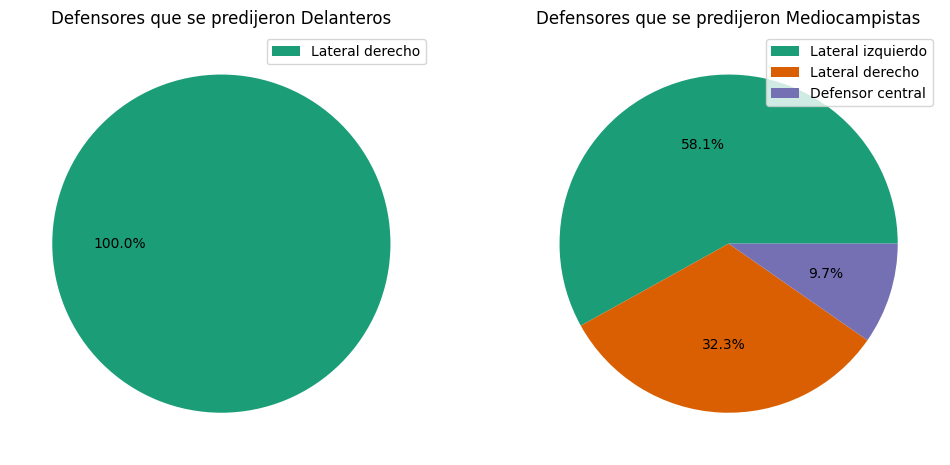

In [40]:
test_filtrado2 = df_test[df_test['Posición general_num'] == 2]
defensores_0 = test_filtrado2[test_filtrado2['predict'] == 0]
defensores_1 = test_filtrado2[test_filtrado2['predict'] == 1]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

pos0 = defensores_0['Posición específica'].value_counts()
labels0 = pos0.index.to_list()
colors0 = plt.cm.Dark2(range(len(labels0)))
axs[0].pie(pos0, colors=colors0, autopct='%1.1f%%')
axs[0].set_title('Defensores que se predijeron Delanteros')

axs[0].legend(labels=labels0)


pos1 = defensores_1['Posición específica'].value_counts()
labels2 = pos1.index.to_list()
colors2 = plt.cm.Dark2(range(len(labels2)))
axs[1].pie(pos1, colors=colors2, autopct='%1.1f%%')
axs[1].set_title('Defensores que se predijeron Mediocampistas')

axs[1].legend(labels=labels2)

plt.show()

Quienes son esos laterales q el modelo predijo delanteros


In [41]:
cond = ['Lateral derecho']
laterales_ofensivos = defensores_0[defensores_0['Posición específica'].isin(cond)]

#### Importancia de características

---

In [42]:
importancia = xgb.feature_importances_
features = df_numerico.columns

feature_importance_df = pd.DataFrame({'Features': features, 'Determinación': importancia}).sort_values(by = 'Determinación', ascending= False)

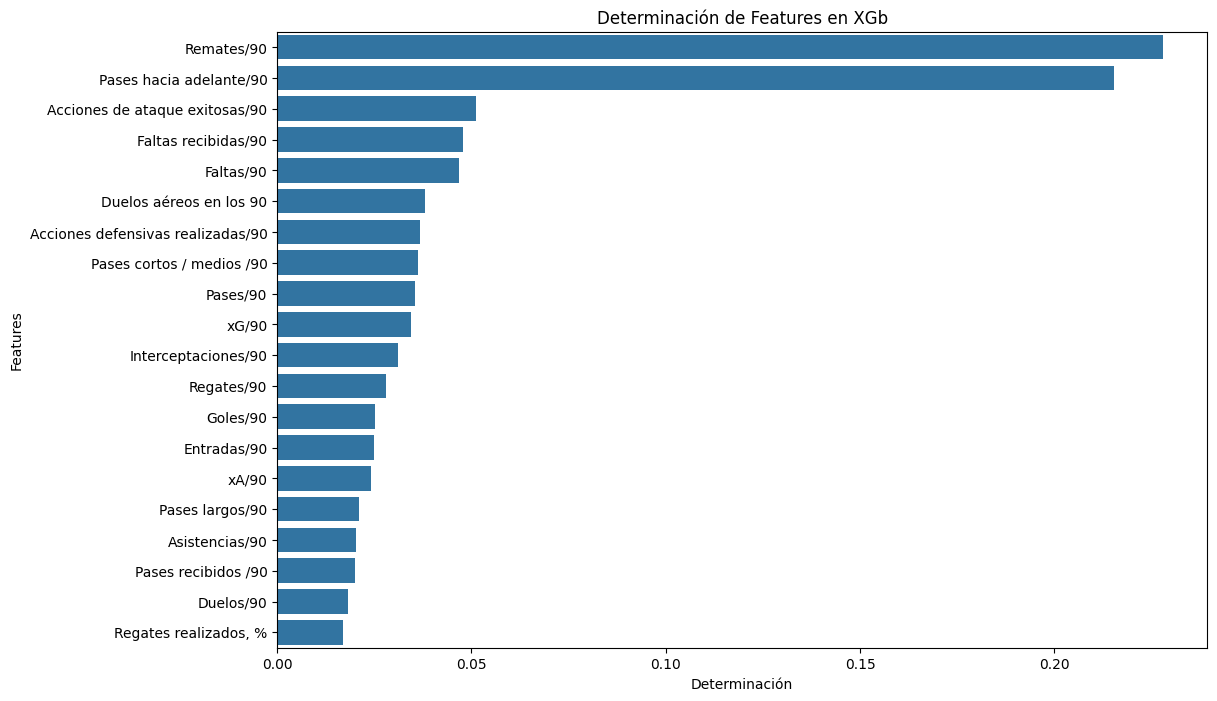

In [43]:
# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Determinación', y='Features', data=feature_importance_df)
plt.title('Determinación de Features en XGb')
plt.show()

#### Búsqueda de por qué se predicen mal las posiciones

---

In [44]:
# Predicciones incorrectas
incorrect_indices = np.where(y_test != y_pred)[0]

# Jugadores mal clasificados
X_incorrect = X_test[incorrect_indices]
y_incorrect = y_test[incorrect_indices]
y_pred_incorrect = y_pred[incorrect_indices]

print(X_incorrect.shape[0], y_incorrect.shape[0], y_pred_incorrect.shape[0])

131 131 131


/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


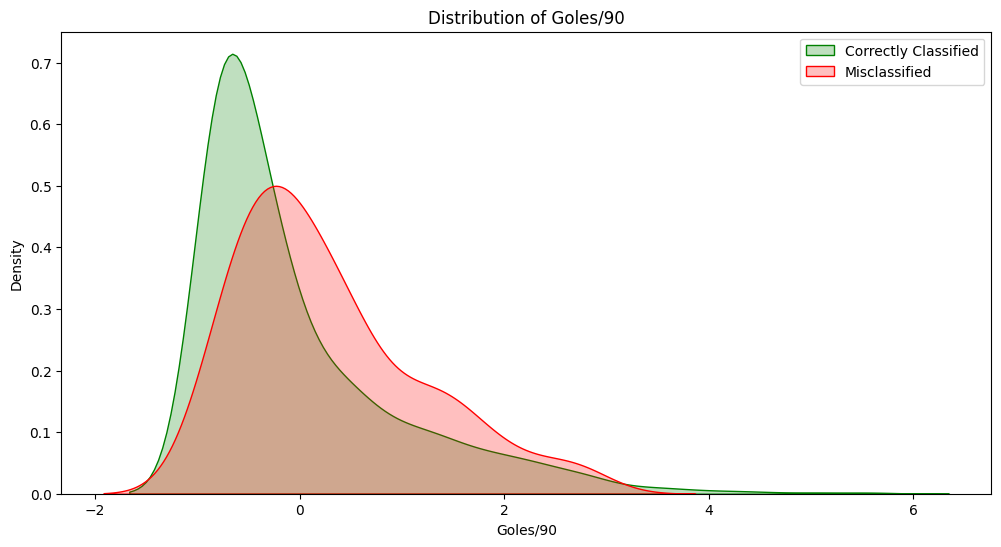

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


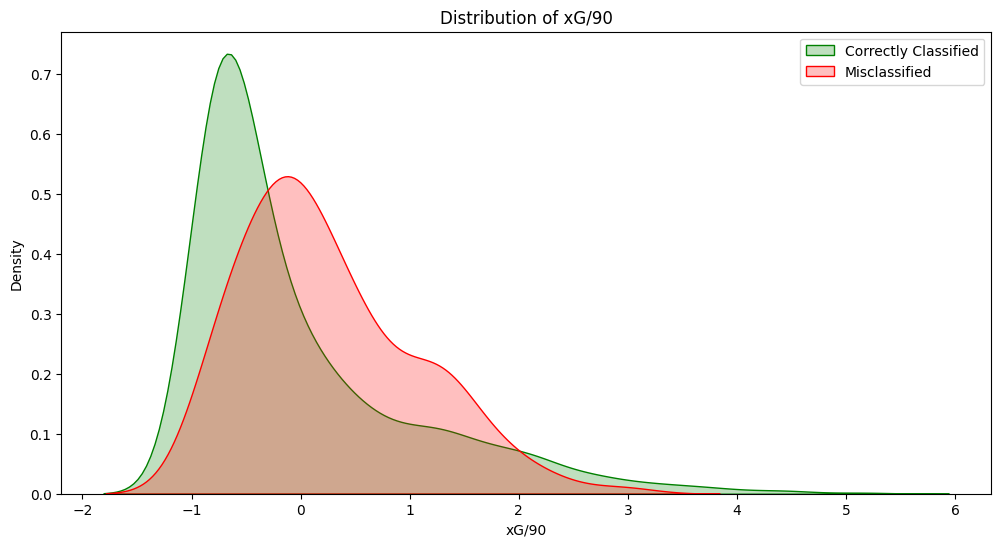

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


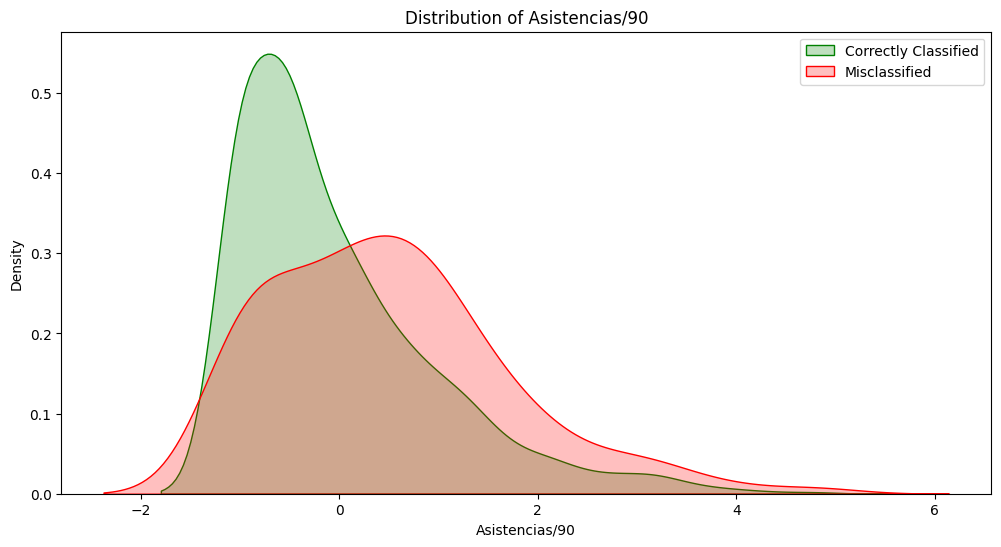

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


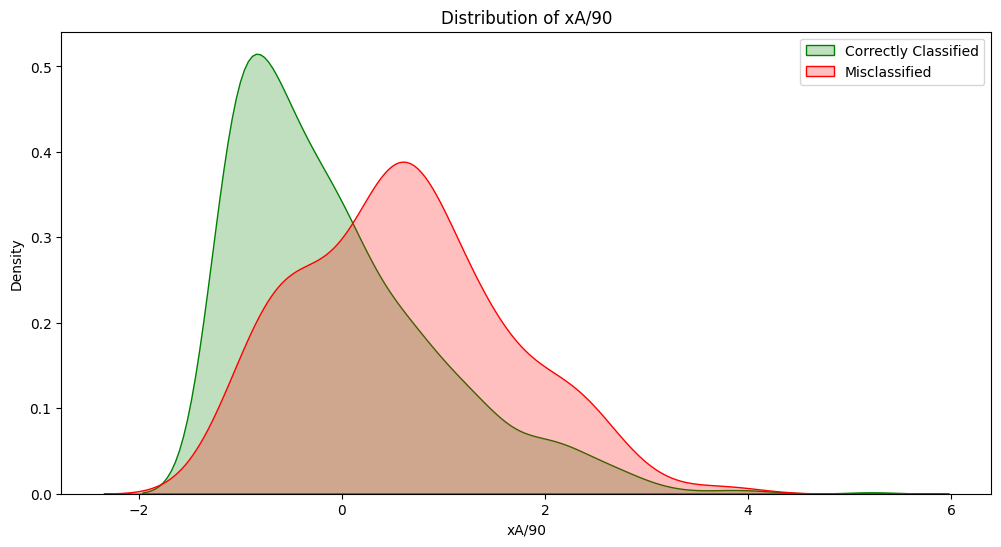

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


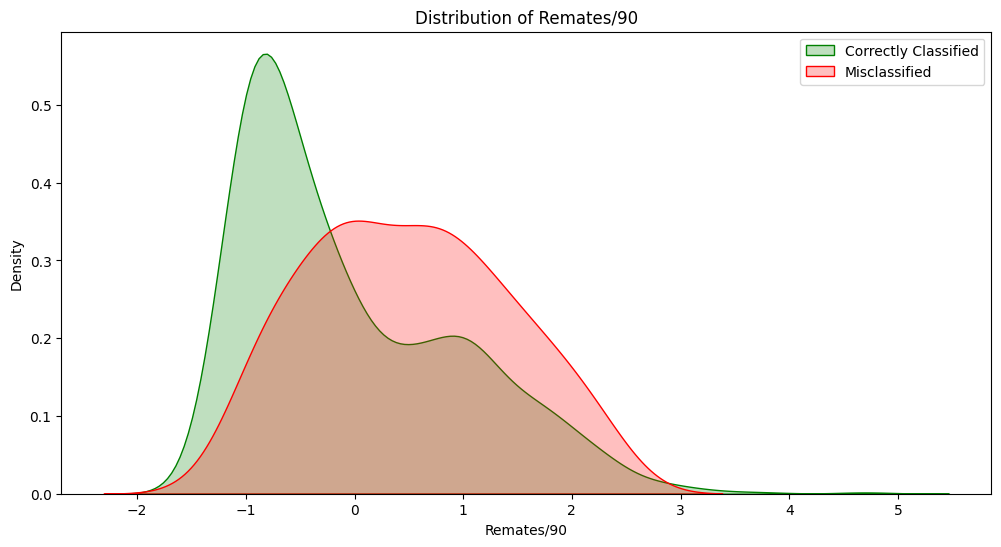

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


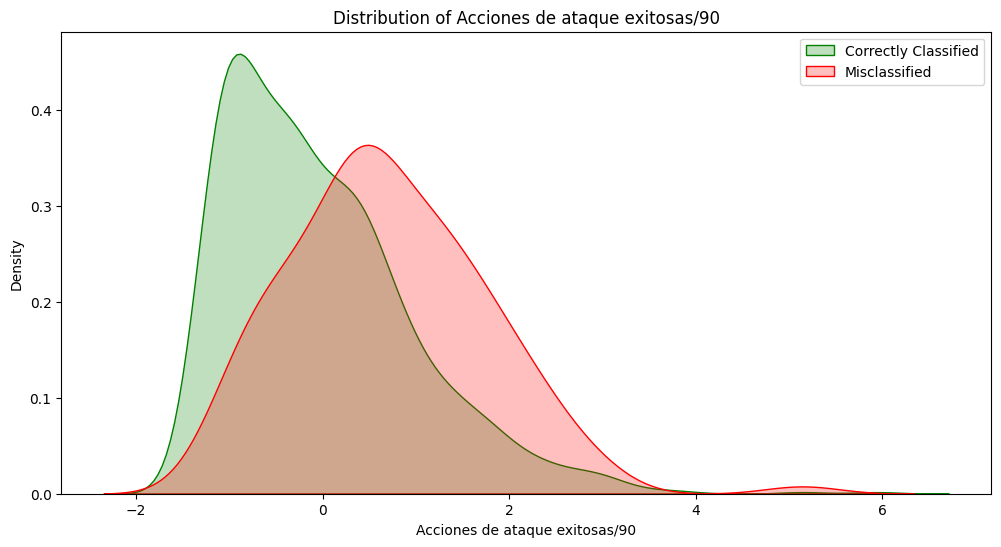

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


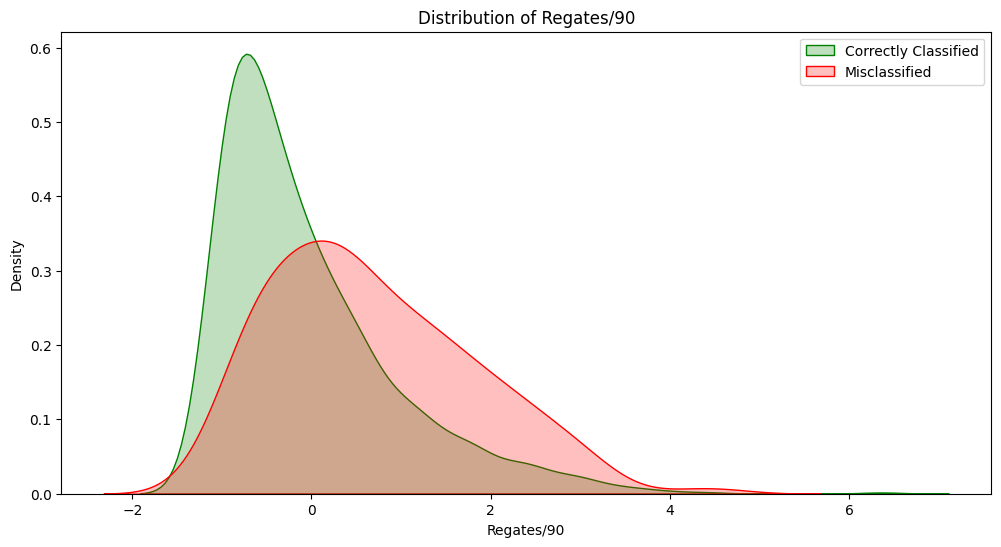

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


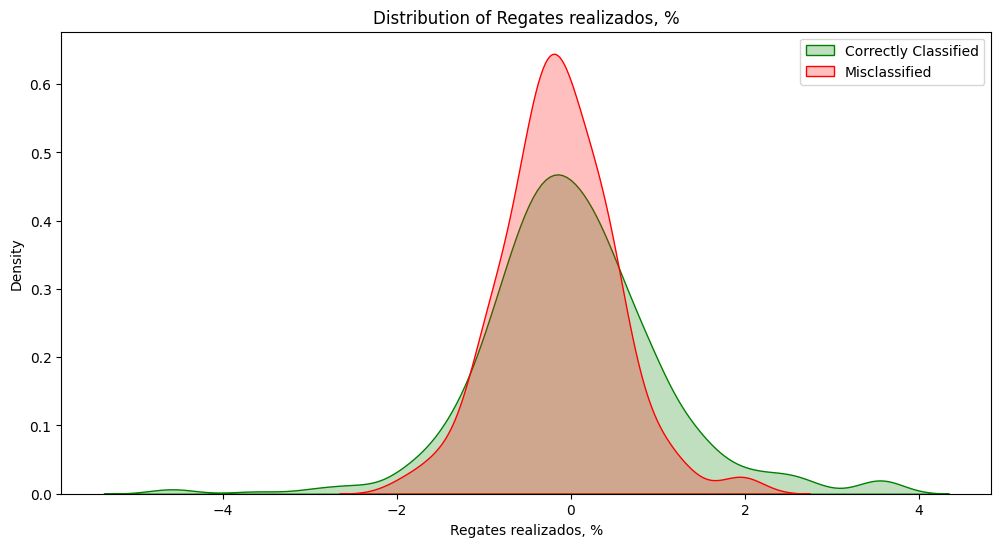

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


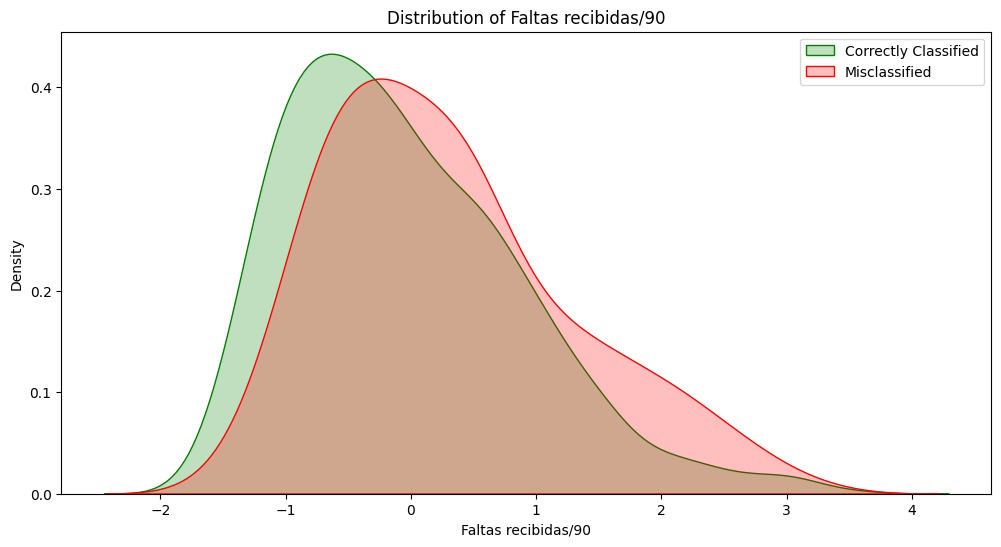

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


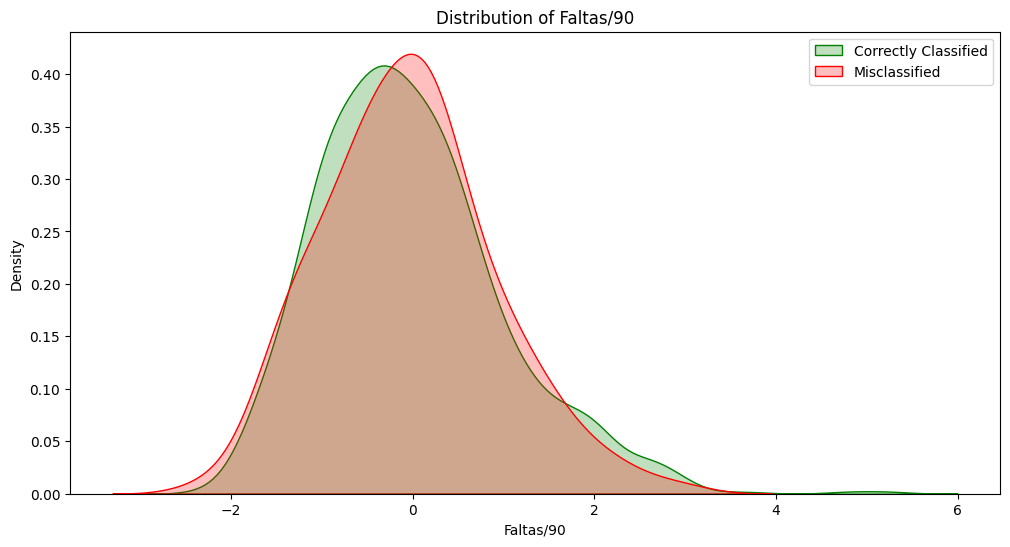

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


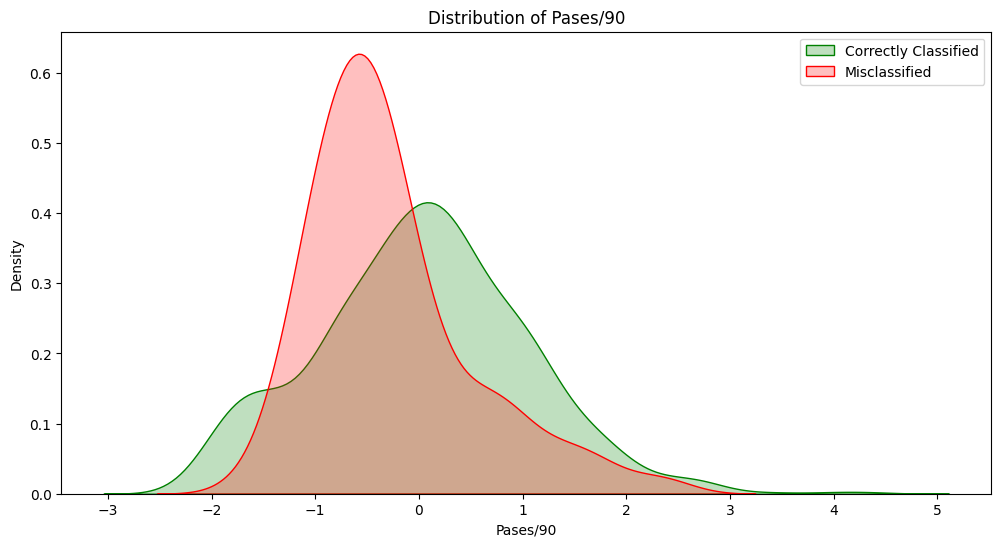

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


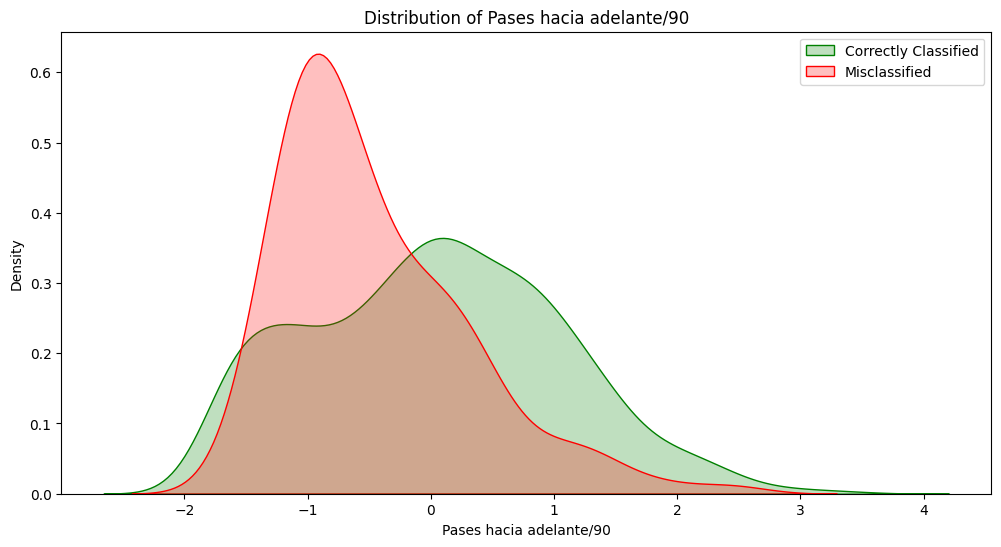

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


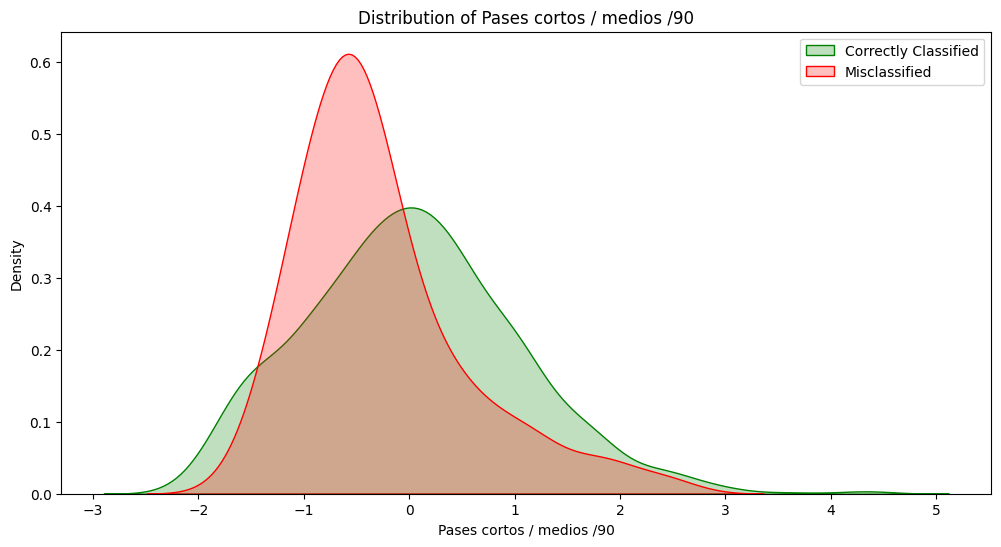

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


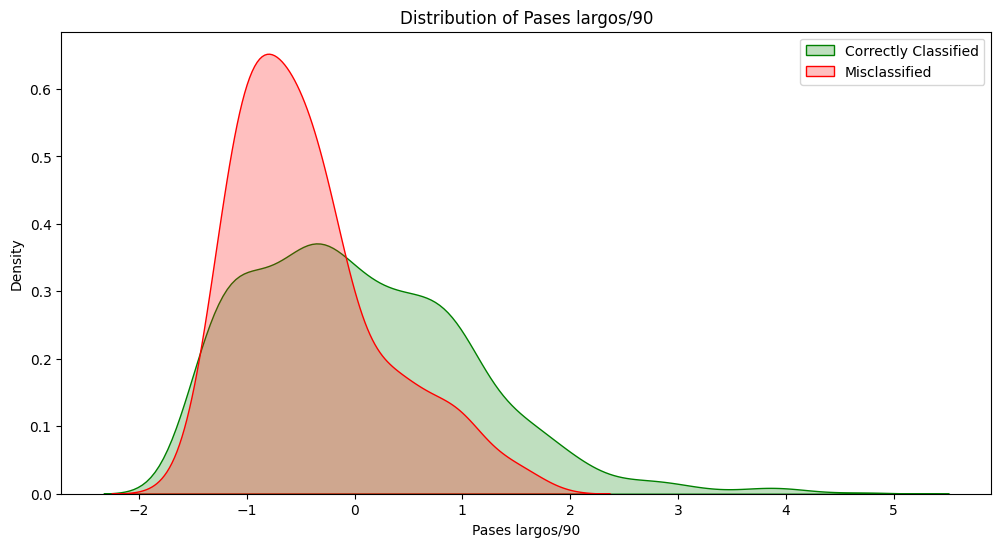

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


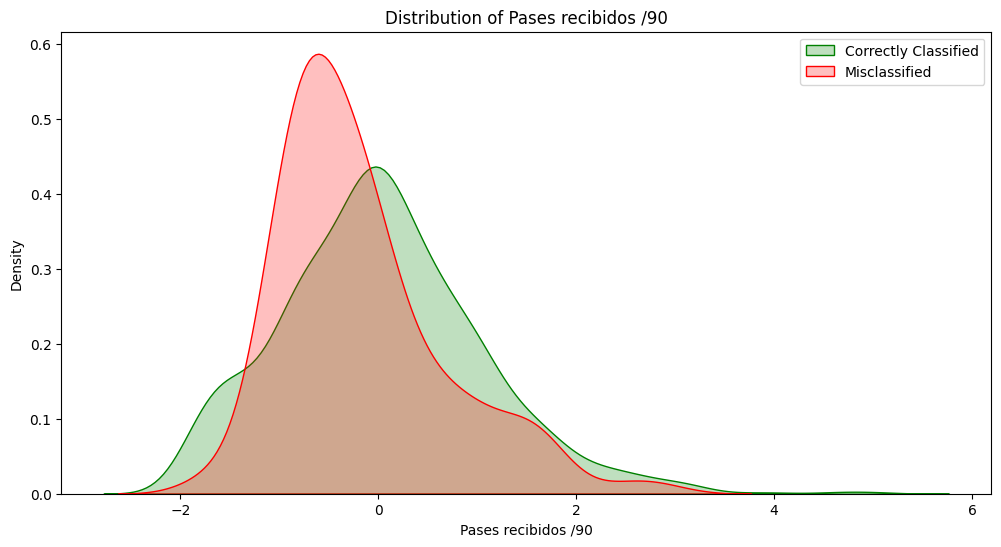

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


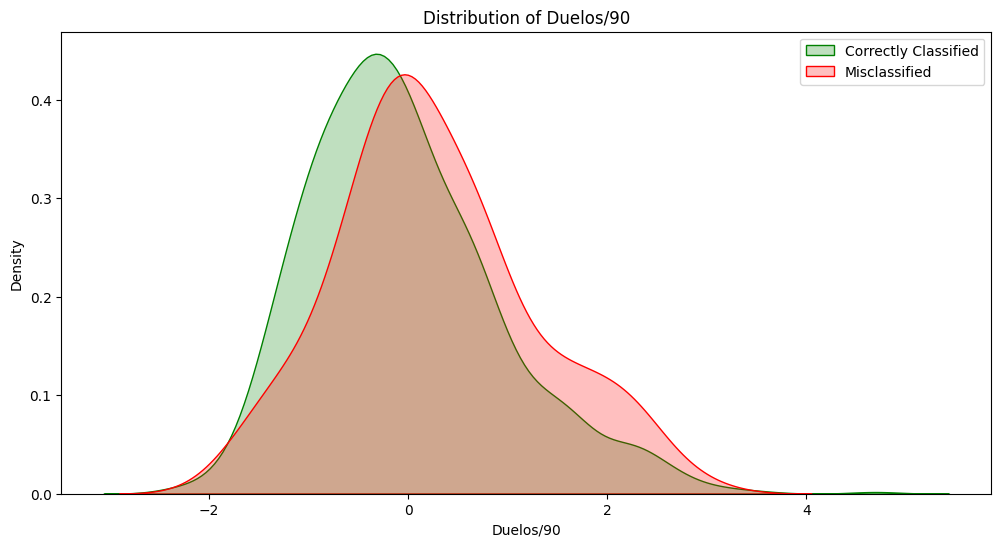

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


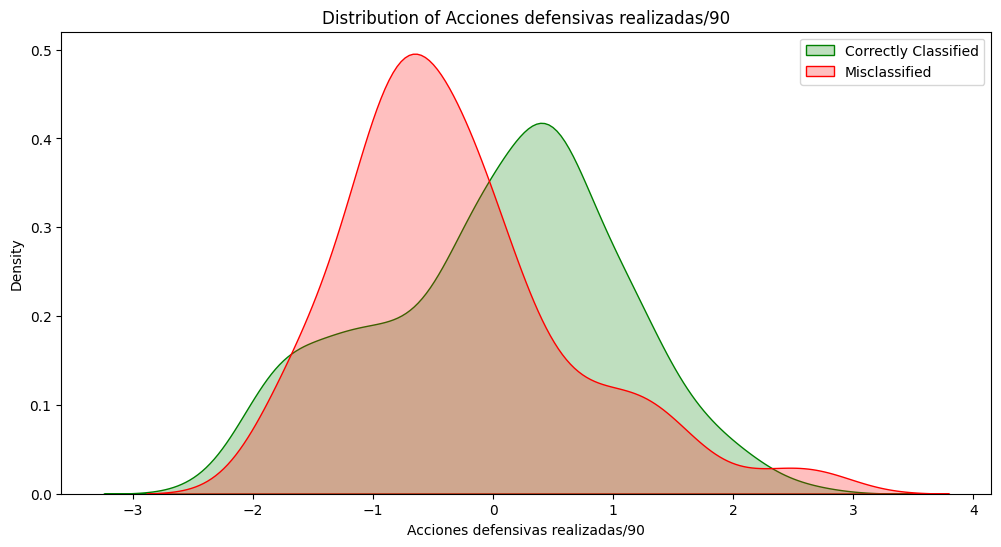

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


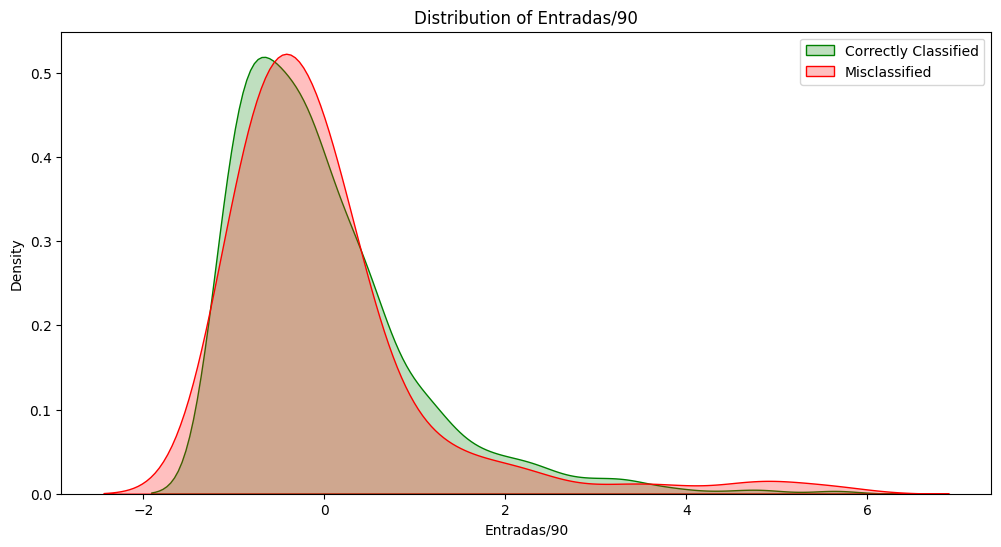

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


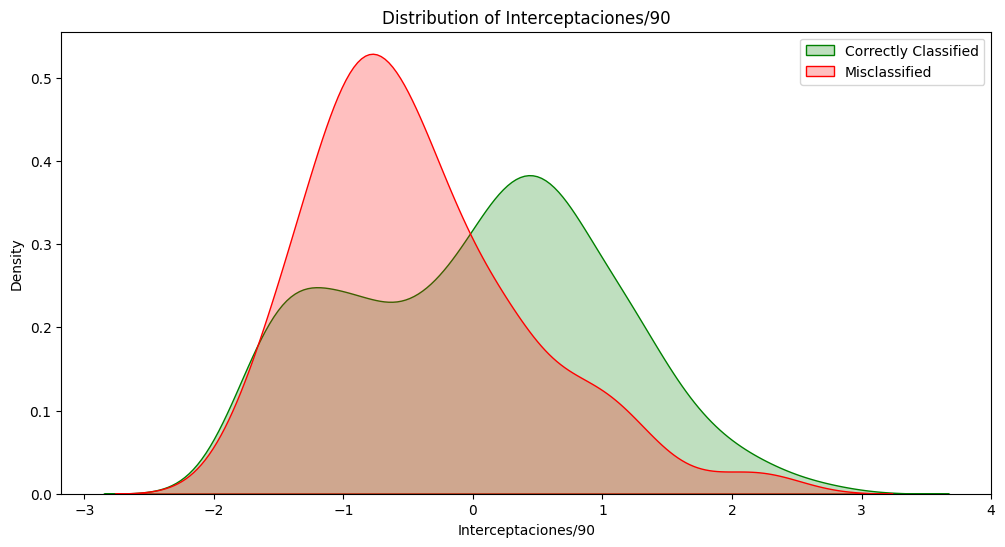

/tmp/ipython-input-45-3854282689.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
/tmp/ipython-input-45-3854282689.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')


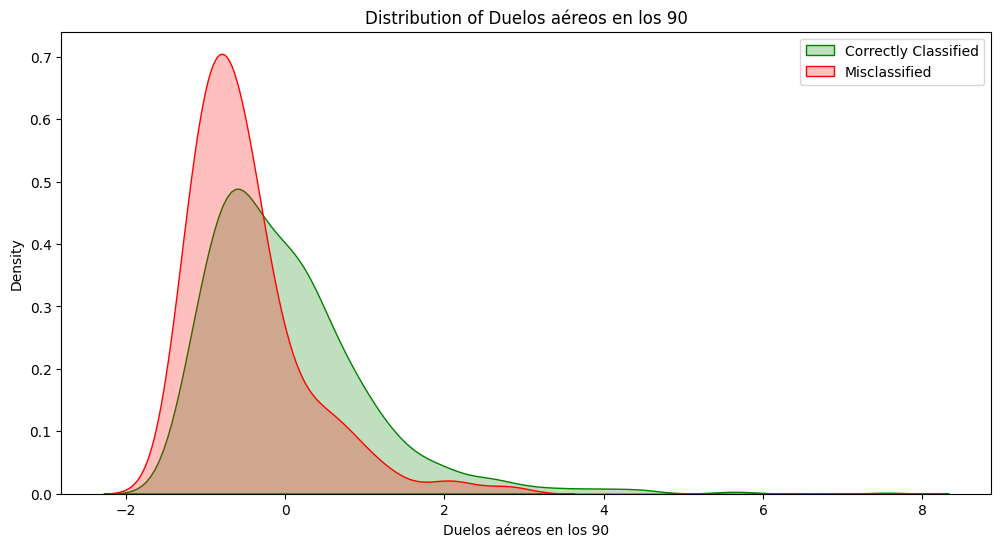

In [45]:
feature_names = columnas_elegidas_

X_test_df = pd.DataFrame(X_test, columns=feature_names)
X_incorrect_df = pd.DataFrame(X_incorrect, columns=feature_names)

features = feature_names

for feature in features:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(X_test_df[feature], label='Correctly Classified', shade=True, color='g')
    sns.kdeplot(X_incorrect_df[feature], label='Misclassified', shade=True, color='r')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


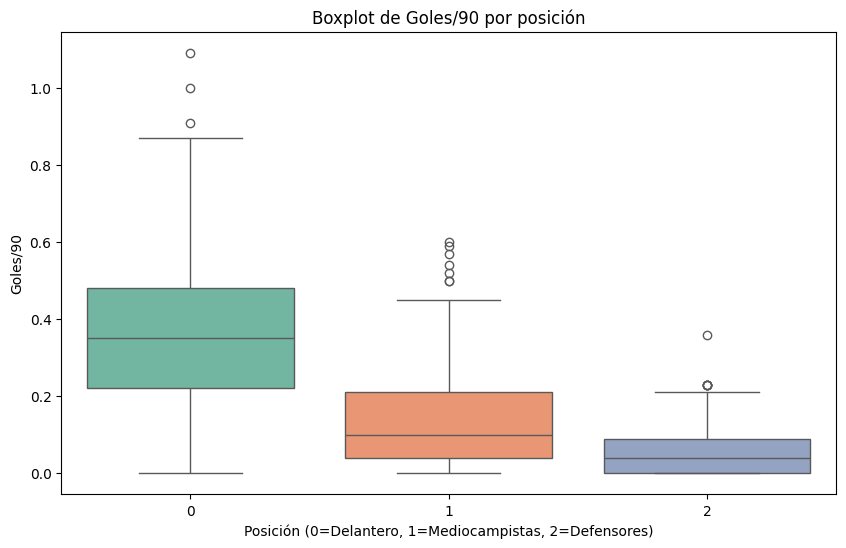

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


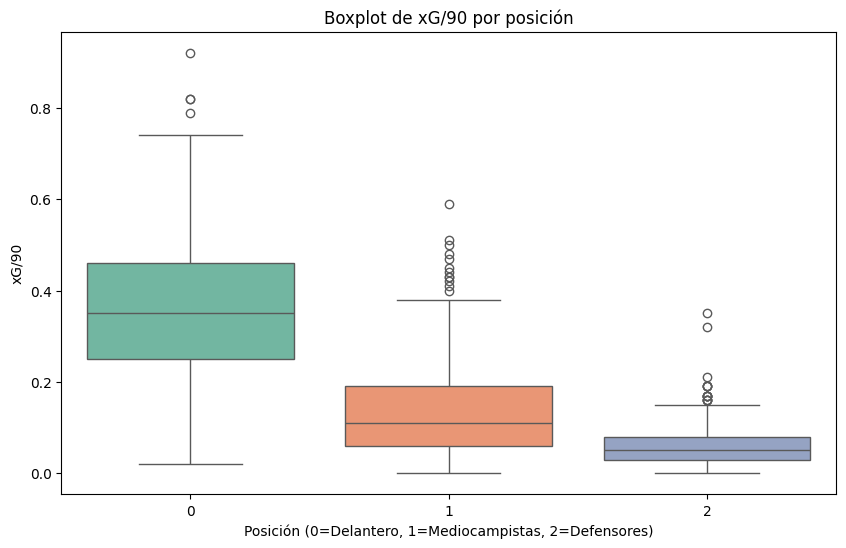

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


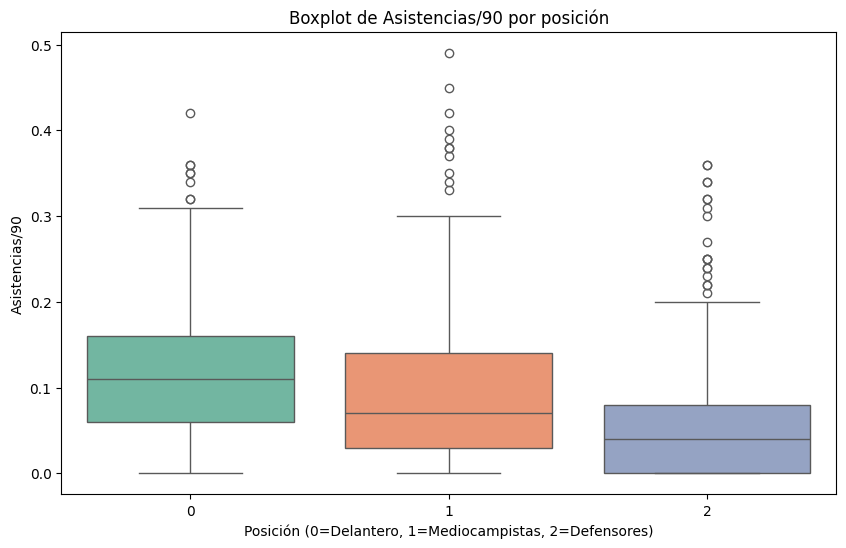

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


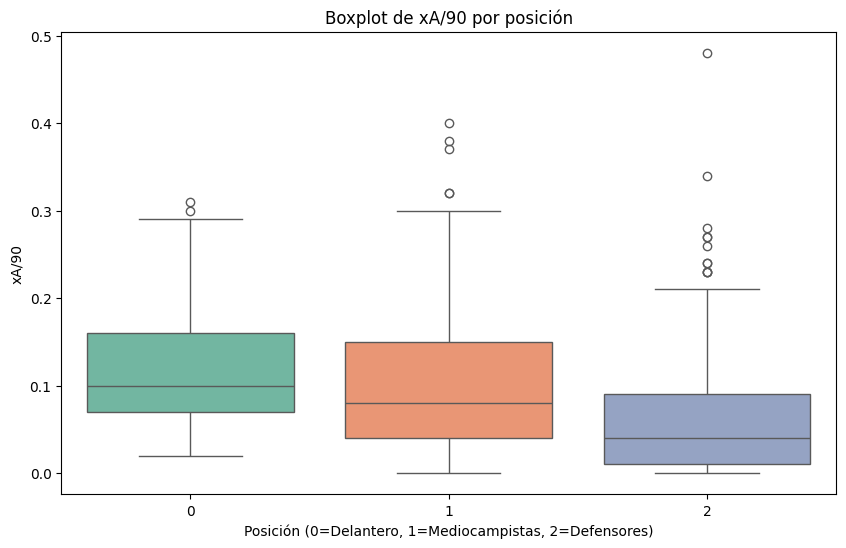

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


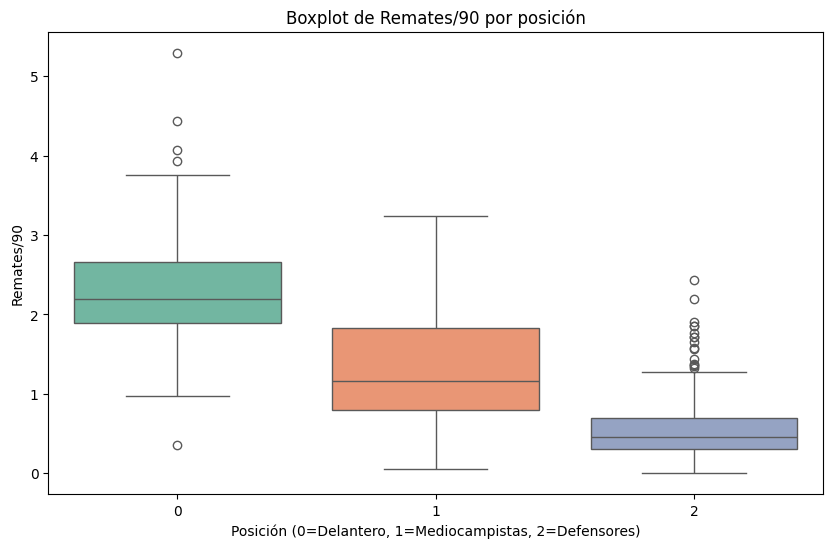

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


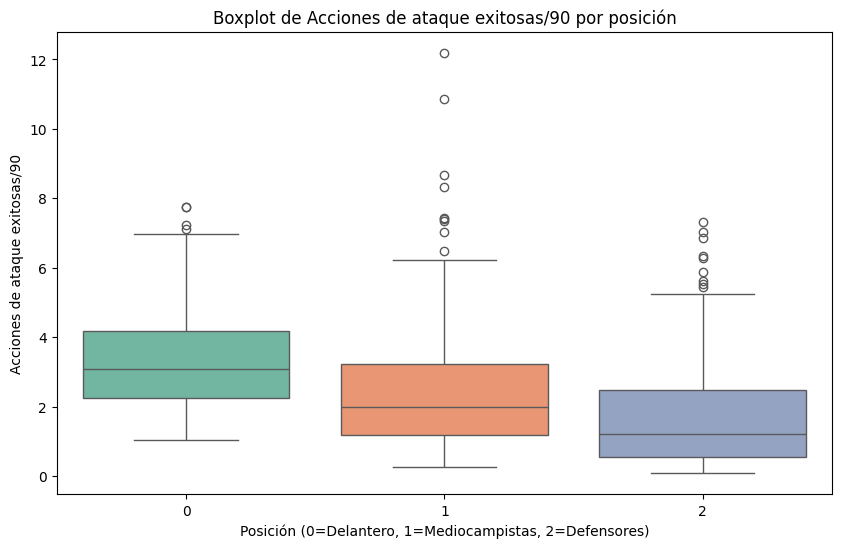

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


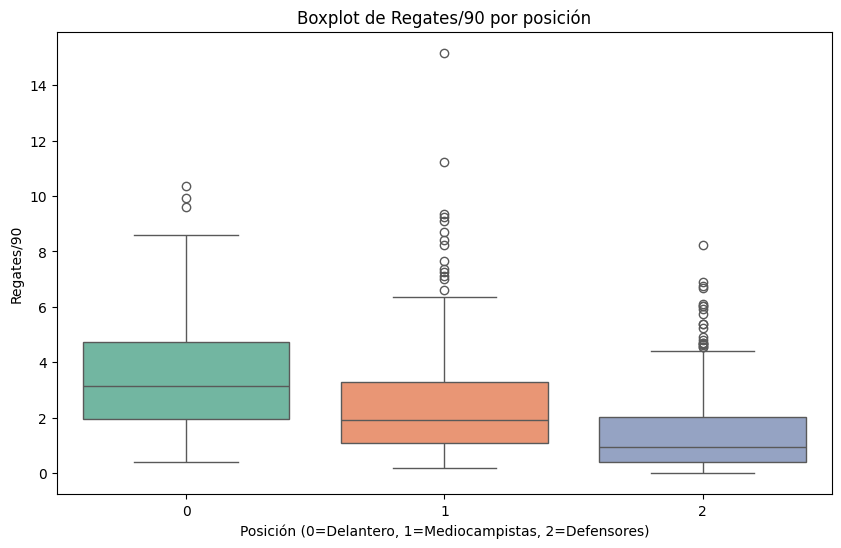

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


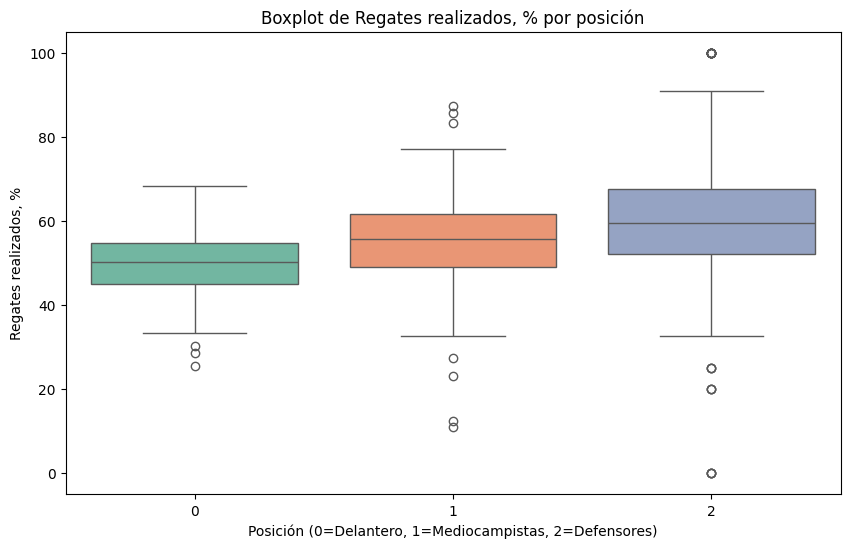

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


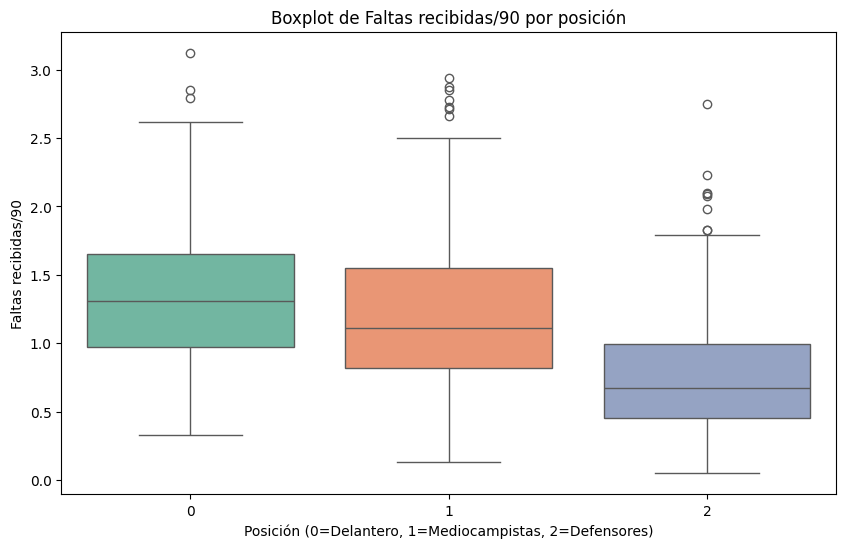

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


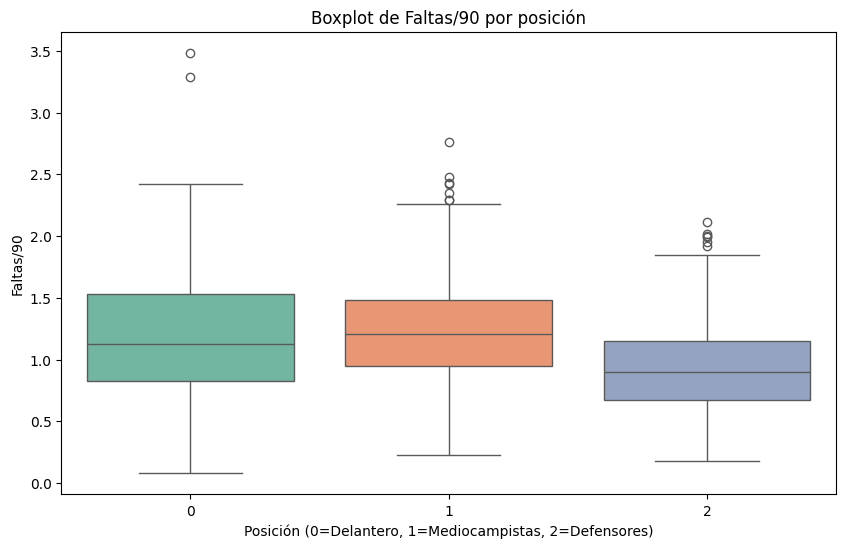

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


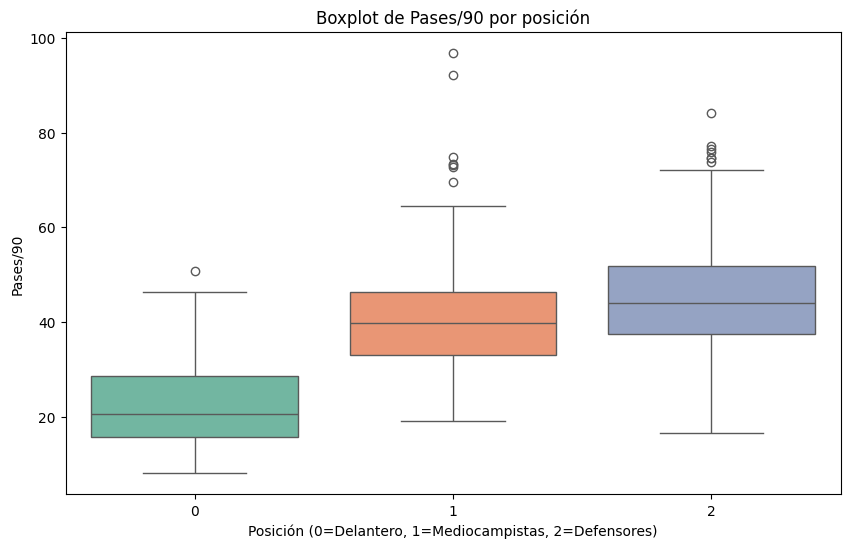

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


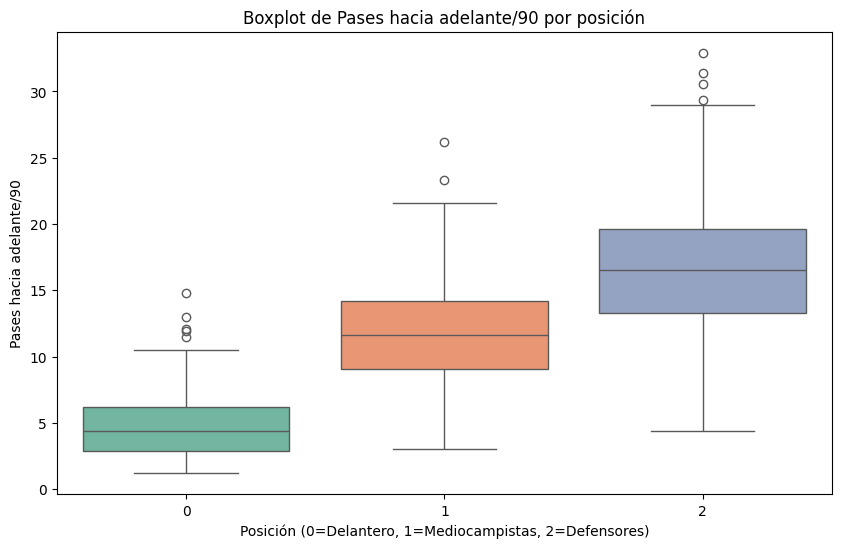

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


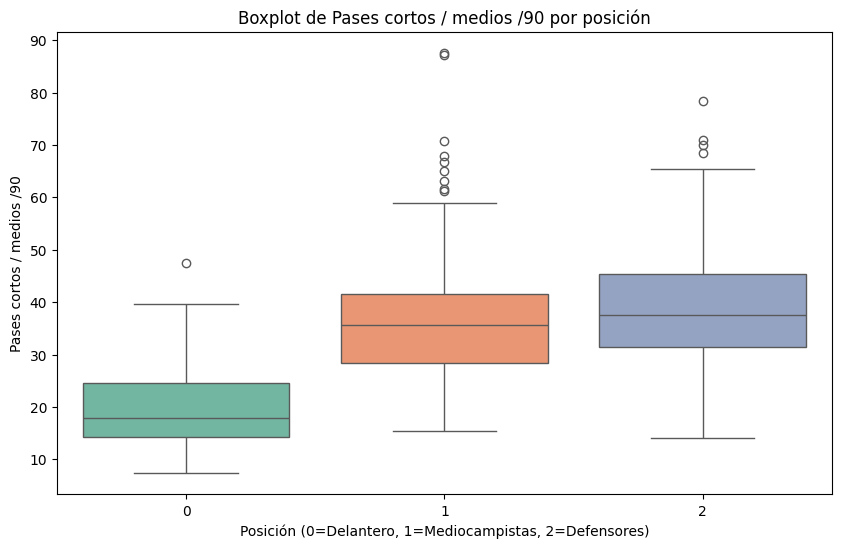

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


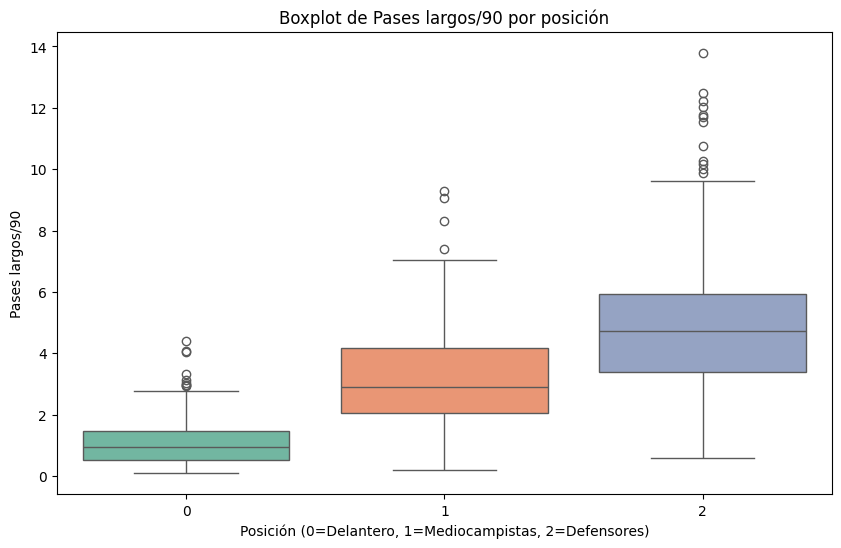

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


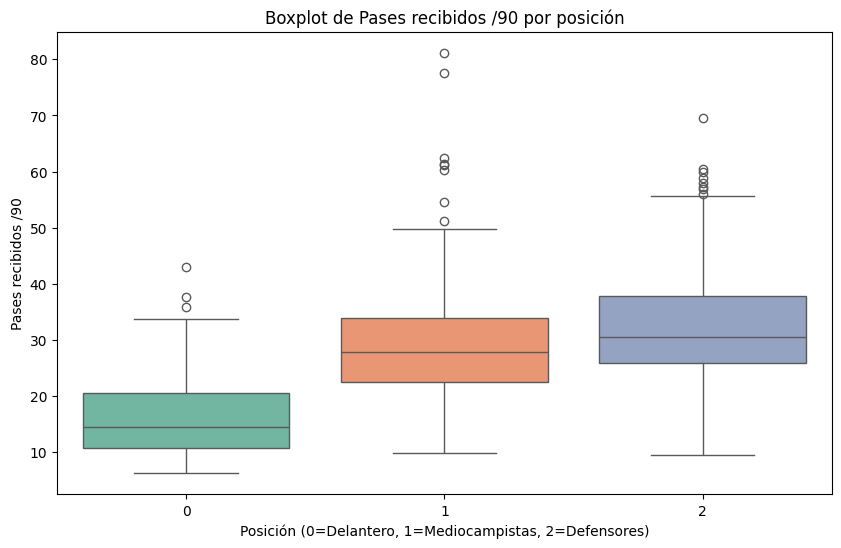

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


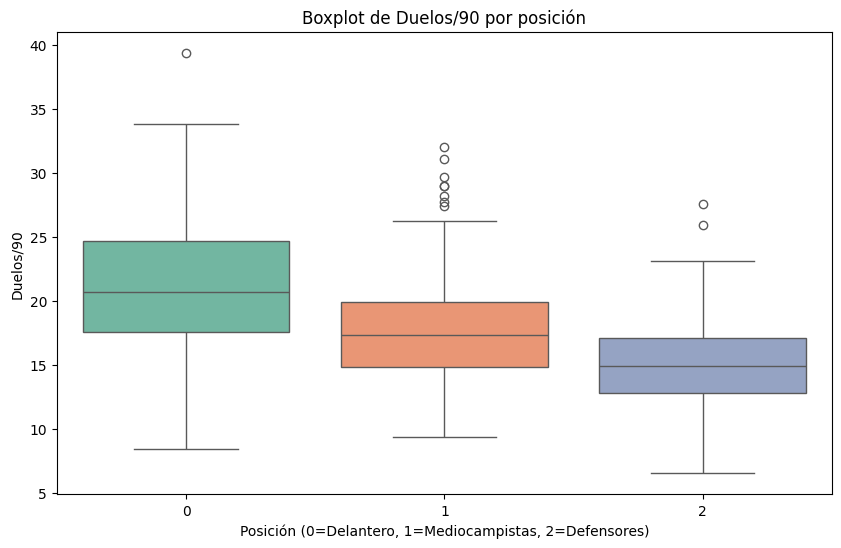

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


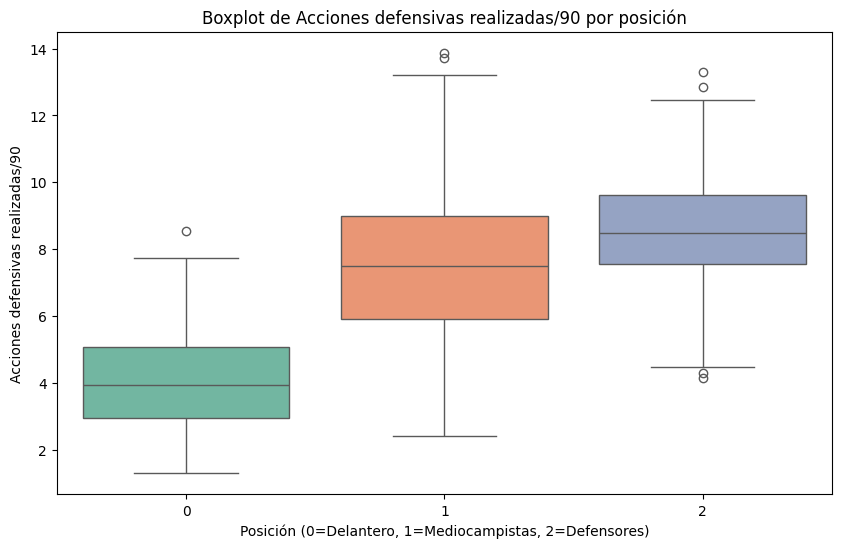

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


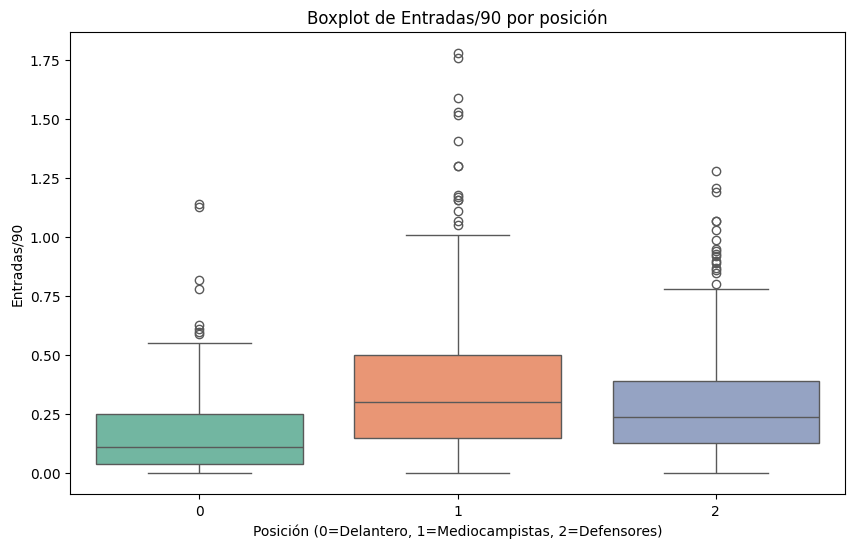

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


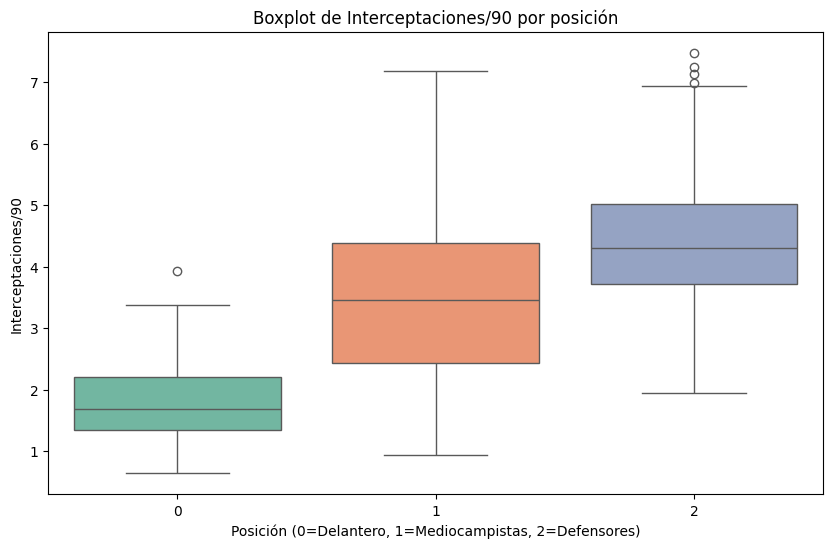

/tmp/ipython-input-46-4019409666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')


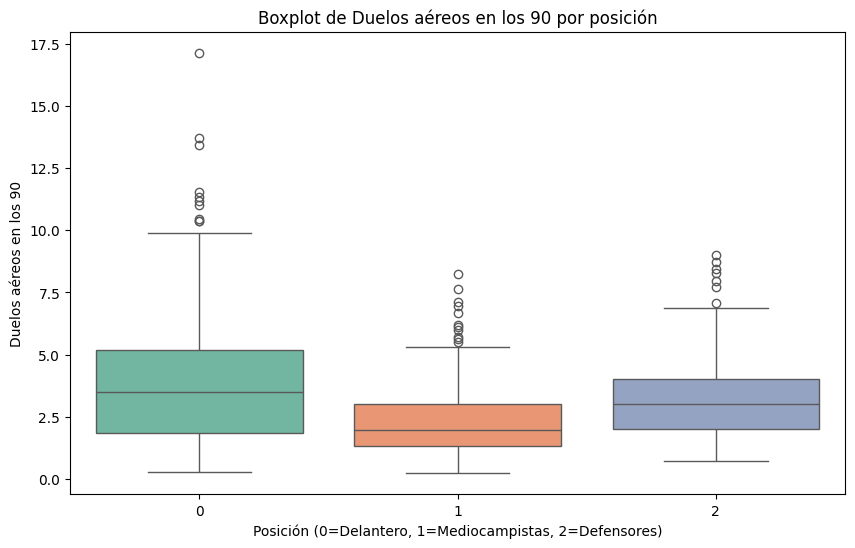

In [46]:
features_to_compare = columnas_elegidas_
for feature in features_to_compare:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_test, x='Posición general_num', y=feature, palette='Set2')
    plt.title(f'Boxplot de {feature} por posición')
    plt.xlabel('Posición (0=Delantero, 1=Mediocampistas, 2=Defensores)')
    plt.ylabel(feature)
    plt.show()

#### Análisis exhaustivo de los mediocampistas mal clasificados


---

In [47]:
# Filtrar los datos para los mediocampistas ofensivos correctamente clasificados
true_midfielders = df_test[(df_test['Posición general_num'] == 1) & (df_test['predict'] == 1)]
misclassified_midfielders = df_test[(df_test['Posición general_num'] == 1) & (df_test['predict'] == 0)]
true_forwards = df_test[(df_test['Posición general_num'] == 0) & (df_test['predict'] == 0)]
missclasified_delanteros = df_test[(df_test['Posición general_num'] == 0) & (df_test['predict'] == 1)]

# Seleccionar las características más relevantes
features_ofensivas = columnas_elegidas_[0:7]
features_grales = columnas_elegidas_[7:14]
features_defensivas = columnas_elegidas_[15:19]

# Calcular los promedios para cada grupo
true_midfielders_mean_of = true_midfielders[features_ofensivas].mean()
misclassified_midfielders_mean_of = misclassified_midfielders[features_ofensivas].mean()
true_forwards_mean_of = true_forwards[features_ofensivas].mean()
missclasified_delanteros_mean_of = missclasified_delanteros[features_ofensivas].mean()


true_midfielders_mean_gral = true_midfielders[features_grales].mean()
misclassified_midfielders_mean_gral = misclassified_midfielders[features_grales].mean()
true_forwards_mean_gral = true_forwards[features_grales].mean()
missclasified_delanteros_mean_general = missclasified_delanteros[features_grales].mean()

true_midfielders_mean_def = true_midfielders[features_defensivas].mean()
misclassified_midfielders_mean_def = misclassified_midfielders[features_defensivas].mean()
true_forwards_mean_def = true_forwards[features_defensivas].mean()
missclasified_delanteros_mean_def = missclasified_delanteros[features_defensivas].mean()

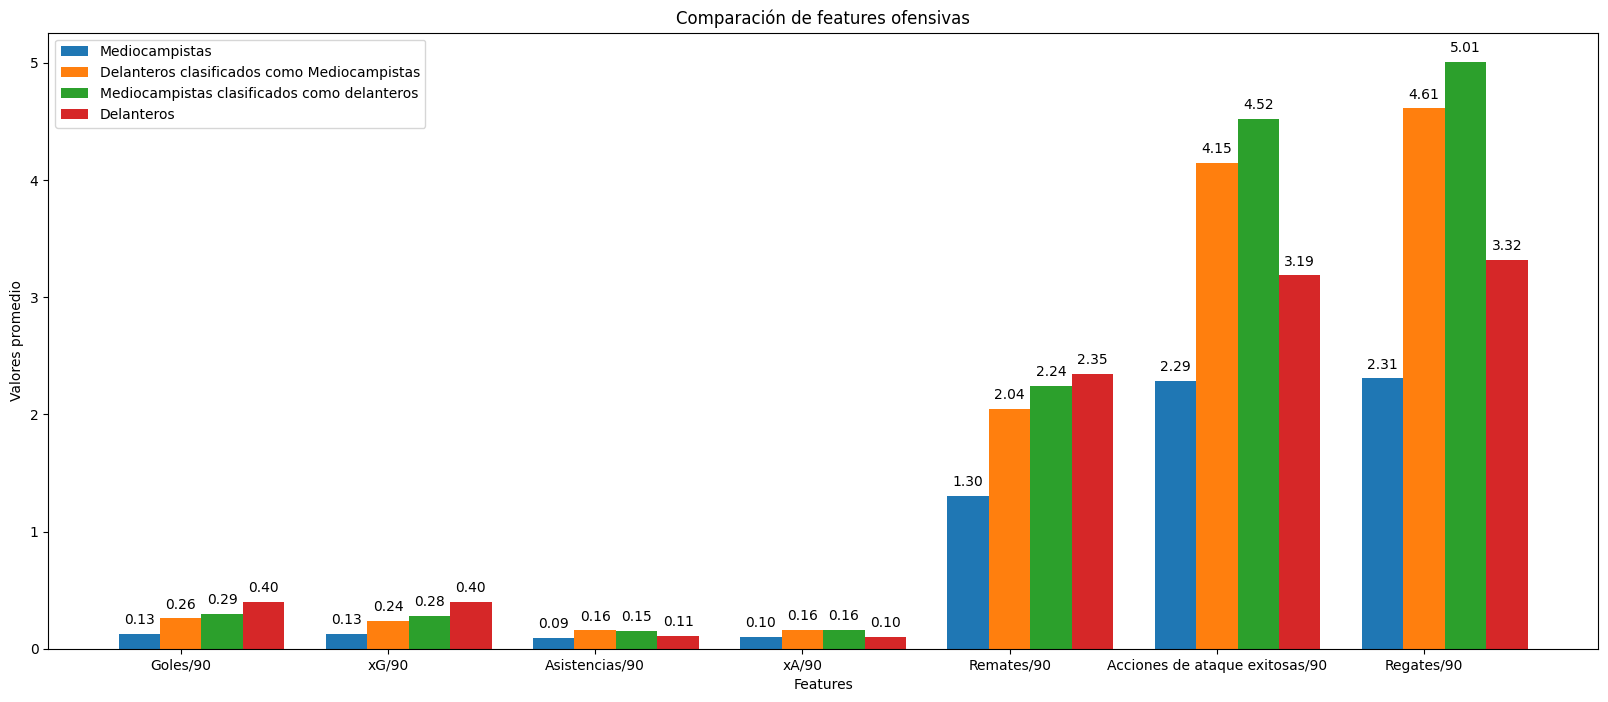

In [48]:
# Creamos gráficos de barras para comparar los promedios de características ofensivas
x = np.arange(len(features_ofensivas))
width = 0.2

fig, ax = plt.subplots(figsize=(20, 8))

bars1 = ax.bar(x - width, true_midfielders_mean_of, width, label='Mediocampistas')
bars2 = ax.bar(x, missclasified_delanteros_mean_of, width, label='Delanteros clasificados como Mediocampistas')
bars3 = ax.bar(x + width, misclassified_midfielders_mean_of, width, label='Mediocampistas clasificados como delanteros')
bars4 = ax.bar(x + (width*2), true_forwards_mean_of, width, label='Delanteros')


ax.set_xlabel('Features')
ax.set_ylabel('Valores promedio')
ax.set_title('Comparación de features ofensivas')
ax.set_xticks(x)
ax.set_xticklabels(features_ofensivas)
ax.legend()


def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

plt.show()


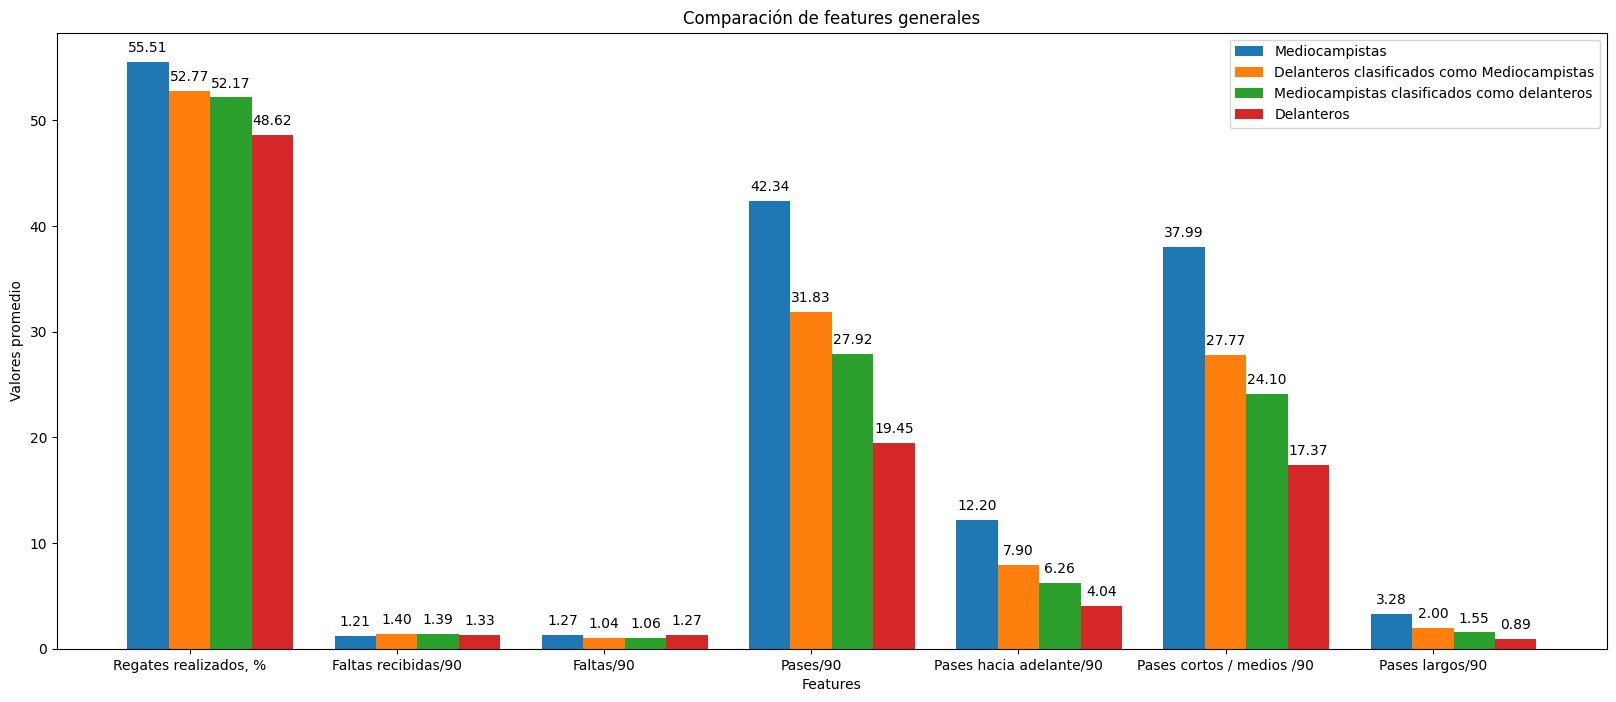

In [49]:
# Creamos gráficos de barras para comparar los promedios de características ofensivas
x = np.arange(len(features_grales))
width = 0.2

fig, ax = plt.subplots(figsize=(20, 8))

bars1 = ax.bar(x - width, true_midfielders_mean_gral, width, label='Mediocampistas')
bars2 = ax.bar(x, missclasified_delanteros_mean_general, width, label='Delanteros clasificados como Mediocampistas')
bars3 = ax.bar(x + width, misclassified_midfielders_mean_gral, width, label='Mediocampistas clasificados como delanteros')
bars4 = ax.bar(x + (width*2), true_forwards_mean_gral, width, label='Delanteros')


ax.set_xlabel('Features')
ax.set_ylabel('Valores promedio')
ax.set_title('Comparación de features generales')
ax.set_xticks(x)
ax.set_xticklabels(features_grales)
ax.legend()


def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

plt.show()

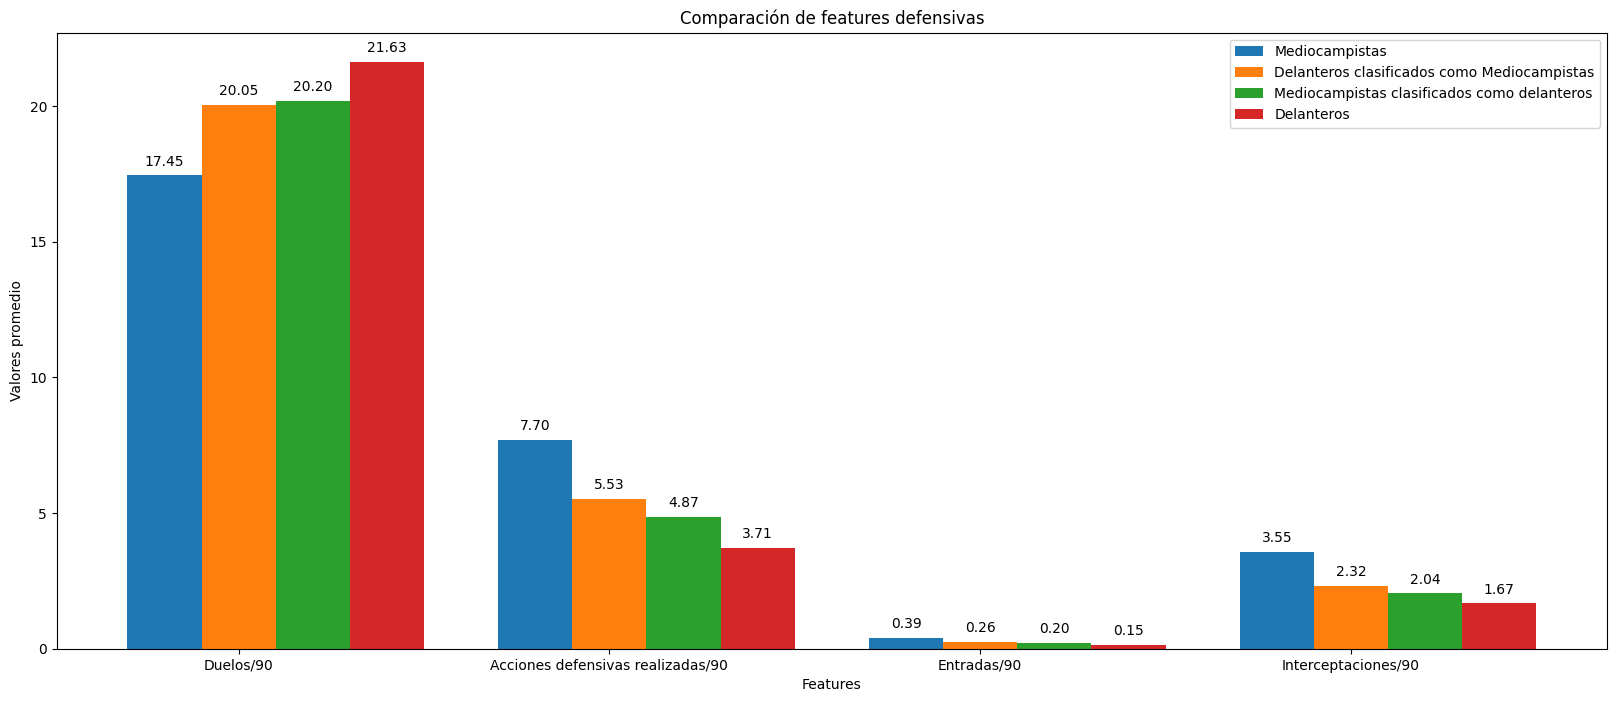

In [ ]:
# Creamos gráficos de barras para comparar los promedios de características ofensiva
x = np.arange(len(features_defensivas))
width = 0.2
fig, ax = plt.subplots(figsize=(20, 8))

bars1 = ax.bar(x - width, true_midfielders_mean_def, width, label='Mediocampistas')
bars2 = ax.bar(x, missclasified_delanteros_mean_def, width, label='Delanteros clasificados como Mediocampistas')
bars3 = ax.bar(x + width, misclassified_midfielders_mean_def, width, label='Mediocampistas clasificados como delanteros')
bars4 = ax.bar(x + (width*2), true_forwards_mean_def, width, label='Delanteros')


ax.set_xlabel('Features')
ax.set_ylabel('Valores promedio')
ax.set_title('Comparación de features defensivas')
ax.set_xticks(x)
ax.set_xticklabels(features_defensivas)
ax.legend()


def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

plt.show()

/tmp/ipython-input-52-3908333103.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([true_midfielders_mean_of, misclassified_midfielders_mean_of, true_forwards_mean_of],


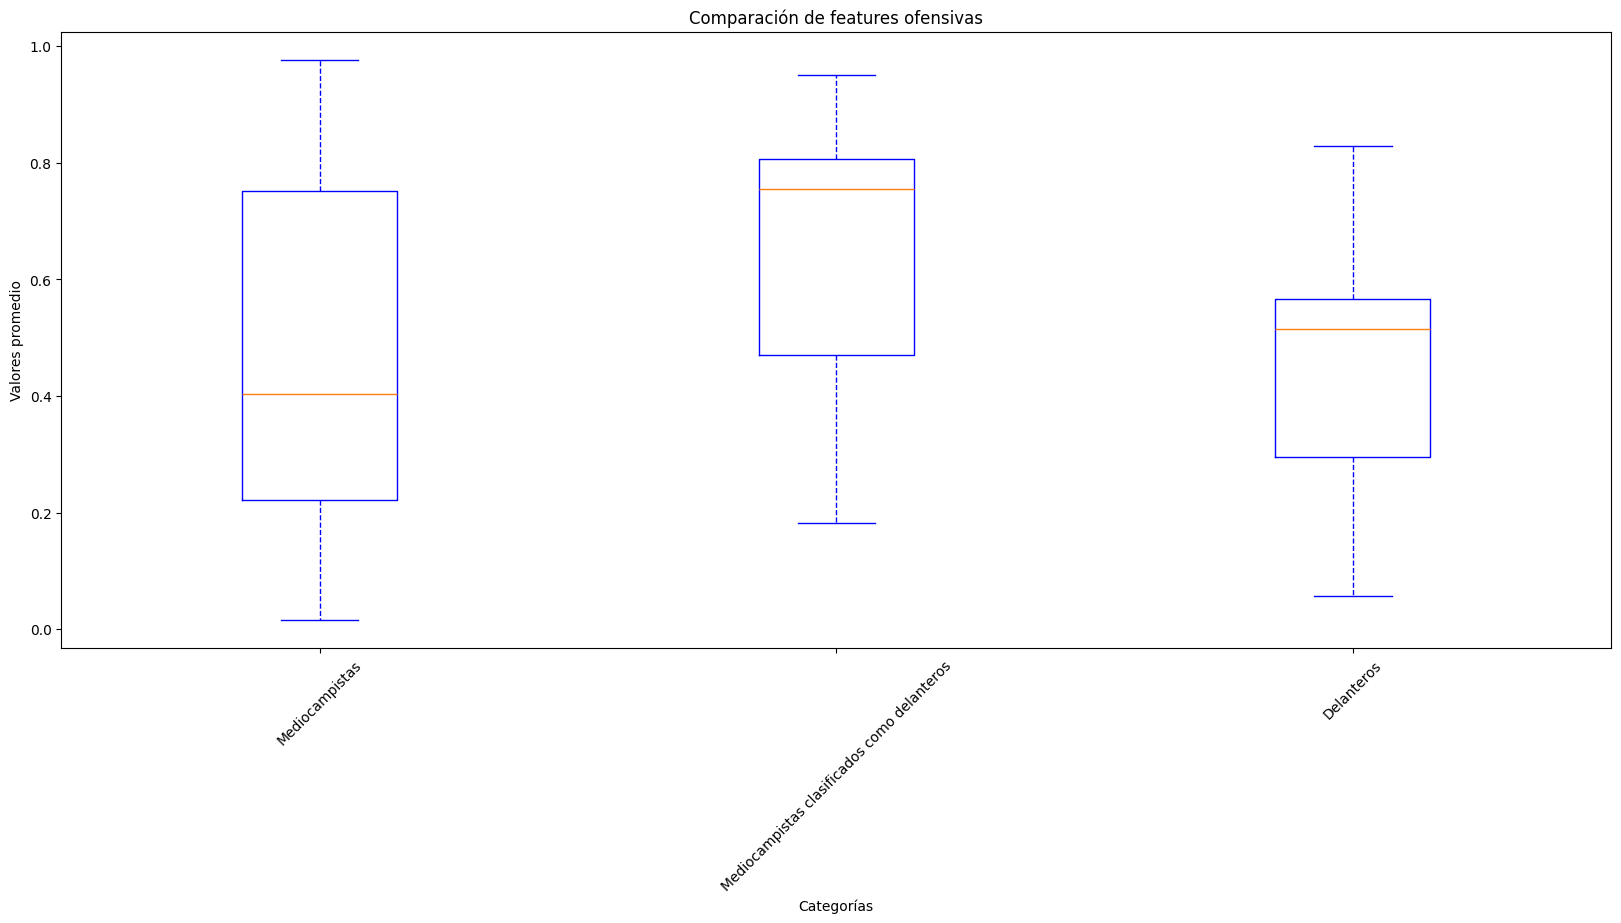

In [ ]:
true_midfielders_mean_of = np.random.rand(10)
misclassified_midfielders_mean_of = np.random.rand(10)
true_forwards_mean_of = np.random.rand(10)
features_ofensivas = [f'Feature {i}' for i in range(1, 11)]


fig, ax = plt.subplots(figsize=(20, 8))


boxprops = dict(color='blue')
whiskerprops = dict(color='blue', linestyle='--')
capprops = dict(color='blue')

ax.boxplot([true_midfielders_mean_of, misclassified_midfielders_mean_of, true_forwards_mean_of],
            labels=['Mediocampistas', 'Mediocampistas clasificados como delanteros', 'Delanteros'],
            boxprops=boxprops,
            whiskerprops=whiskerprops,
            capprops=capprops)

ax.set_xlabel('Categorías')
ax.set_ylabel('Valores promedio')
ax.set_title('Comparación de features ofensivas')

plt.xticks(rotation=45)

plt.show()

### Conclusión

En este trabajo se abordó el desafío de predecir la posición general de jugadores de fútbol profesional a partir de sus estadísticas individuales, utilizando datos de las principales ligas europeas. Se realizó un exhaustivo proceso de limpieza y transformación de datos, seleccionando variables relevantes tanto ofensivas, defensivas como generales. Tras analizar la distribución y correlación de las características, se aplicaron modelos de clasificación Random Forest y XGBoost, siendo este último el que mostró mejores métricas de desempeño.

El análisis de los errores de clasificación permitió identificar patrones en los jugadores mal clasificados, observando que las posiciones específicas con roles híbridos o intermedios tienden a confundirse entre categorías. Además, el estudio de la importancia de las variables reveló cuáles son los factores más determinantes para la predicción de la posición.

En síntesis, el modelo desarrollado es capaz de predecir con buena precisión la posición general de los jugadores, y el análisis de los errores aporta información valiosa para entender la versatilidad y características de ciertos perfiles de futbolistas. Esta metodología puede ser útil para clubes y analistas en la toma de decisiones sobre el uso y la valoración de los jugadores.

In [ ]:
'''

# Ejemplo de posible extensión: Predicción de la posición específica usando XGBoost

# Primero, codificamos la columna 'Posición específica' a valores numéricos
le = LabelEncoder()
df_playstyle['Posición específica_num'] = le.fit_transform(df_playstyle['Posición específica'])

# Definimos las variables predictoras y la variable objetivo
X = features_scaled
y_especifica = df_playstyle['Posición específica_num']

# Dividimos en train y test
X_train_es, X_test_es, y_train_es, y_test_es = train_test_split(X, y_especifica, test_size=0.3, random_state=42)

# Entrenamos un modelo XGBoost para la posición específica
xgb_especifica = XGBClassifier(n_estimators=200, max_depth=22, random_state=42)
xgb_especifica.fit(X_train_es, y_train_es)

# Realizamos predicciones y mostramos el reporte de clasificación
y_pred_es = xgb_especifica.predict(X_test_es)
print("Reporte de clasificación para Posición específica:")
print(classification_report(y_test_es, y_pred_es, target_names=le.classes_))

'''

In [ ]:
'''
# Ejemplo de extensión: Predicción de la liga a la que pertenece un jugador según sus estadísticas

# Codificamos la columna 'Liga' a valores numéricos
le_liga = LabelEncoder()
df_playstyle['Liga_num'] = le_liga.fit_transform(df_playstyle['Liga'])

# Definimos las variables predictoras y la variable objetivo
X = features_scaled
y_liga = df_playstyle['Liga_num']

# Dividimos en train y test
X_train_liga, X_test_liga, y_train_liga, y_test_liga = train_test_split(X, y_liga, test_size=0.3, random_state=42)

# Entrenamos un modelo XGBoost para la predicción de la liga
xgb_liga = XGBClassifier(n_estimators=200, max_depth=22, random_state=42)
xgb_liga.fit(X_train_liga, y_train_liga)

# Realizamos predicciones y mostramos el reporte de clasificación
y_pred_liga = xgb_liga.predict(X_test_liga)
print("Reporte de clasificación para Liga:")
print(classification_report(y_test_liga, y_pred_liga, target_names=le_liga.classes_))
'''